# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?
# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.
# Technical Requirements:
• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply 
regularization and determine the optimal values of Hyper
Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

# EDA:

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df_train.shape

(1168, 81)

In [6]:
df_test.shape

(292, 80)

In [7]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [12]:
df_train = df_train.drop(["Alley"],axis=1)
df_train = df_train.drop(["PoolQC"],axis=1)
df_train = df_train.drop(["Fence"],axis=1)
df_train = df_train.drop(["MiscFeature"],axis=1)

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [14]:
df_test = df_test.drop(["Alley"],axis=1)
df_test = df_test.drop(["PoolQC"],axis=1)
df_test = df_test.drop(["Fence"],axis=1)
df_test = df_test.drop(["MiscFeature"],axis=1)

In [15]:
df_train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

In [16]:
df_train.drop("Id",axis=1,inplace=True)
df_train.drop("Utilities",axis=1,inplace=True)

In [17]:
df_test.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath       3
BsmtHalfBath 

In [18]:
df_test.drop("Id", axis=1,inplace=True)
df_test.drop("Utilities", axis=1, inplace=True)

In [19]:
#checking value counts
for i in df_train.columns:
        print(df_train[i].value_counts())
        print("________________________")

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
________________________
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
________________________
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0       7
35.0       7
95.0       7
62.0       7
61.0       7
94.0       6
54.0       6
44.0       6
96.0       6
81.0       6
120.0      6
98.0       6


In [20]:
df_train.drop(columns = ['LowQualFinSF','BsmtFinSF2','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [21]:
#checking value counts
for i in df_test.columns:
        print(df_test[i].value_counts())
        print("________________________")

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
85       1
40       1
Name: MSSubClass, dtype: int64
________________________
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
________________________
60.0     32
85.0     14
50.0     13
70.0     12
21.0      9
65.0      9
80.0      9
75.0      7
52.0      6
63.0      6
78.0      6
66.0      5
64.0      5
57.0      5
43.0      4
72.0      4
55.0      4
100.0     4
40.0      4
74.0      4
102.0     3
48.0      3
93.0      3
79.0      3
86.0      3
110.0     3
67.0      3
90.0      3
68.0      3
44.0      3
76.0      3
24.0      3
56.0      2
83.0      2
58.0      2
92.0      2
32.0      2
35.0      2
73.0      2
47.0      2
96.0      2
107.0     2
42.0      2
51.0      2
37.0      2
62.0      2
91.0      2
98.0      2
105.0     1
150.0     1
61.0      1
45.0      1
137.0     1
89.0      1
34.0      1
124.0

In [22]:
df_test.drop(columns = ['LowQualFinSF','BsmtFinSF2','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [23]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

In [24]:
df_test.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

<AxesSubplot:>

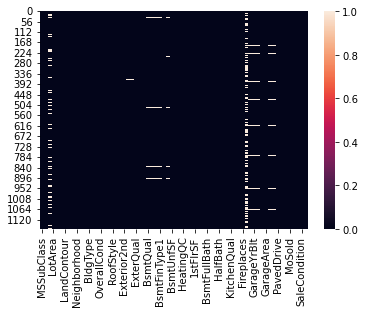

In [25]:
sns.heatmap(df_train.isnull())

In [26]:
df_train['LotFrontage']

0         NaN
1        95.0
2        92.0
3       105.0
4         NaN
5        58.0
6         NaN
7        88.0
8        70.0
9        80.0
10       50.0
11       44.0
12      129.0
13       80.0
14       59.0
15       55.0
16        NaN
17       64.0
18        NaN
19       24.0
20       80.0
21       70.0
22       68.0
23        NaN
24       71.0
25        NaN
26        NaN
27       88.0
28       58.0
29       74.0
30       61.0
31       60.0
32        NaN
33        NaN
34        NaN
35      120.0
36       80.0
37       84.0
38        NaN
39       50.0
40      141.0
41       70.0
42       30.0
43       24.0
44       65.0
45       76.0
46       60.0
47      100.0
48       50.0
49       70.0
50       85.0
51       60.0
52       60.0
53       64.0
54       60.0
55       75.0
56        NaN
57      107.0
58       50.0
59      122.0
60       60.0
61       68.0
62       60.0
63       82.0
64       70.0
65       74.0
66       50.0
67       62.0
68        NaN
69       73.0
70       65.0
71    

In [27]:
# Filling null values of object data column with their mode values (most frequently occurred values).

catcol=df_train.columns.values
for i in range(0,len(catcol)):
    if df_train[catcol[i]].dtype == "object":
        df_train[catcol[i]].fillna(df_train[catcol[i]].mode()[0], inplace=True)

In [28]:
# Filling null values of numerical columns with their mean values

numcol=df_train.columns.values
for i in range(0,len(numcol)):
    if df_train[numcol[i]].dtype != "object":
        df_train[numcol[i]].fillna(df_train[numcol[i]].mean(), inplace=True)

In [29]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

<AxesSubplot:>

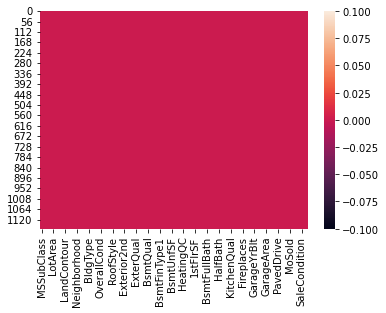

In [30]:
sns.heatmap(df_train.isnull())

In [31]:
# Filling null values of object data column with their mode values (most frequently occurred values).

catcol2=df_test.columns.values
for i in range(0,len(catcol2)):
    if df_test[catcol2[i]].dtype == "object":
        df_test[catcol2[i]].fillna(df_test[catcol2[i]].mode()[0], inplace=True)

In [32]:
# Filling null values of numerical columns with their mean values
numcol2=df_test.columns.values
for i in range(0,len(catcol2)):
    if df_test[numcol2[i]].dtype != "object":
        df_test[numcol2[i]].fillna(df_test[numcol2[i]].mean(), inplace=True)

<AxesSubplot:>

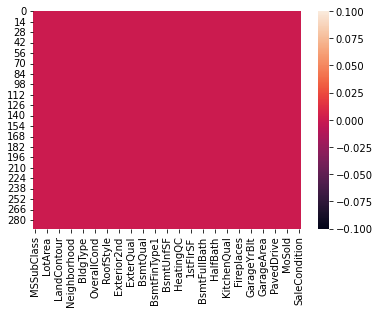

In [33]:
sns.heatmap(df_test.isnull())

In [34]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
4          20       RL     70.98847    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   
3            6            6       1977          1977       Hip  CompShg   
4            6            7       1977          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf        958         1078    GasA        TA          Y   
1          Rec       1043         2217    GasA        Ex          Y   
2          Unf        255         1117    GasA        Ex          Y   
3          Unf       1139         1844    GasA        Ex          Y   
4          Unf        356         1602    GasA        Gd          Y   

  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      SBrkr       958         0        958             0             0   
1      SBrkr      2217         0       2217             1             0   
2      SBrkr      1127       886       2013             1             0   
3      SBrkr      1844         0       1844             0             0   
4      SBrkr      1602         0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1          TA             5   
1         2         0             4             1          Gd             8   
2         2         1             3             1          TA             8   
3         2         0             3             1          TA             7   
4         2         0             3             1          Gd             8   

  Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0        Typ           1          TA     Attchd       1977.0          RFn   
1        Typ           1          TA     Attchd       1970.0          Unf   
2        Typ           1          TA     Attchd       1997.0          Unf   
3        Typ           1          TA     Attchd       1977.0          RFn   
4        T

In [35]:
df_train["Garage_Age"] = df_train.YrSold - df_train.GarageYrBlt
df_train["RemodAdd_Age"] = df_train.YrSold - df_train.YearRemodAdd
df_train["Built_Age"] = df_train.YrSold - df_train.YearBuilt

In [36]:
df_train.drop("GarageYrBlt",axis=1,inplace=True)
df_train.drop("YearRemodAdd",axis=1,inplace=True)
df_train.drop("YearBuilt",axis=1,inplace=True)

In [37]:
df_test["Garage_Age"] = df_test.YrSold - df_test.GarageYrBlt
df_test["RemodAdd_Age"] = df_test.YrSold - df_test.YearRemodAdd
df_test["Built_Age"] = df_test.YrSold - df_test.YearBuilt

In [38]:
df_test.drop("GarageYrBlt",axis=1,inplace=True)
df_test.drop("YearRemodAdd",axis=1,inplace=True)
df_test.drop("YearBuilt",axis=1,inplace=True)

In [39]:
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445   
std     182.047152   462.664785   449.375525   442.272249   391.161983   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   216.000000   799.000000   892.000000   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean    348.826199  1525.066781      0.425514      0.055651     1.562500   
std     439.696370   528.042957      0.521615      0.236699     0.551882   
min       0.000000   334.000000      0.000000      0.000000     0.000000   
25%       0.000000  1143.250000      0.000000      0.000000     1.000000   
50%       0.000000  1468.500000      0.000000      0.000000     2.000000   
75%     729.000000  1795.000000      1.000000      0.000000     2.000000   
max    2065.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

            YrSold      SalePrice   Garage_Age  RemodAdd_Age    Built_Age  
count  1168.000000    1168.000000  1168.000000   1168.000000  1168.000000  
mean   2007.804795  181477.005993    29.610954     23.046233    36.874144  
std       1.329738   79105.586863    24.249798     20.783486    30.193130  
min    2006.000000   34900.000000     0.000000     -1.000000     0.000000  
25%    2007.000000  130375.000000     7.000000      4.000000     8.000000  
50%    2008.000000  163995.000000    28.806159     14.000000    36.000000  
75%    2009.000000  215000.000000    46.250000     42.000000    54.000000  
ma

In [40]:
df_test.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

            YrSold  Garage_Age  RemodAdd_Age   Built_Age  
count   292.000000  292.000000    292.000000  292.000000  
mean   2007.859589   28.099589     22.565068   35.243151  
std       1.322867   23.146410     20.089470   30.494309  
min    2006.000000    0.000000      0.000000    0.000000  
25%    2007.000000    6.000000      4.000000    6.750000  
50%    2008.000000   28.240000     14.000000   32.000000  
75%    2009.000000   42.000000     39.250000   53.250000  
max    2010.000000   90.000000     60.000000  136.000000

# Data Visualisation:

In [41]:
#Creating a list of categorical and numerical datatypes in train dataset
train_catcol=[]
train_numcol=[]
for i in df_train.columns:
    if (df_train[i].dtype=='object'):
          train_catcol.append(i)
    else:
        train_numcol.append(i)

In [42]:
#Creating a list of categorical and numerical datatypes in test dataset
test_catcol=[]
test_numcol=[]
for i in df_test.columns:
    if (df_test[i].dtype=='object'):
          test_catcol.append(i)
    else:
        test_numcol.append(i)

univariate analysis[Nominal Data]:

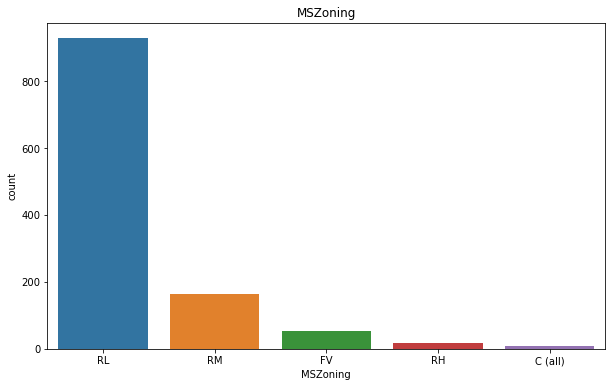

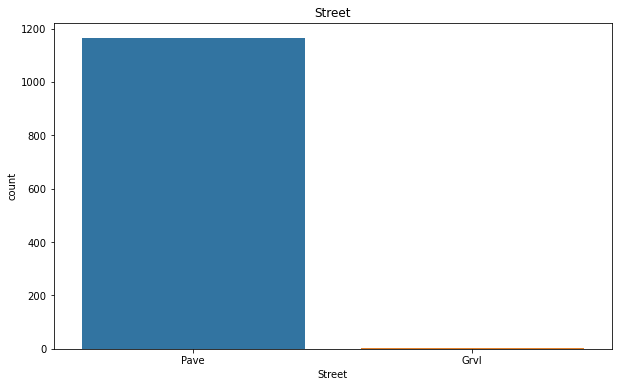

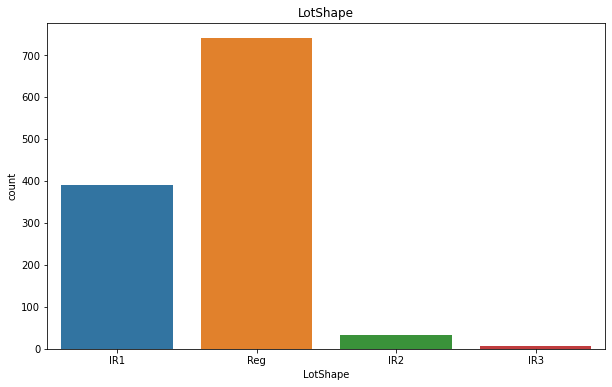

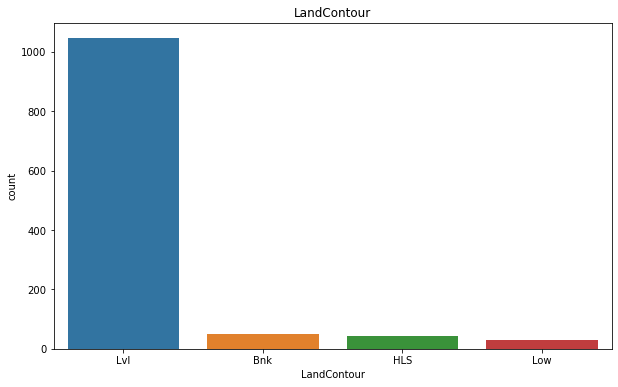

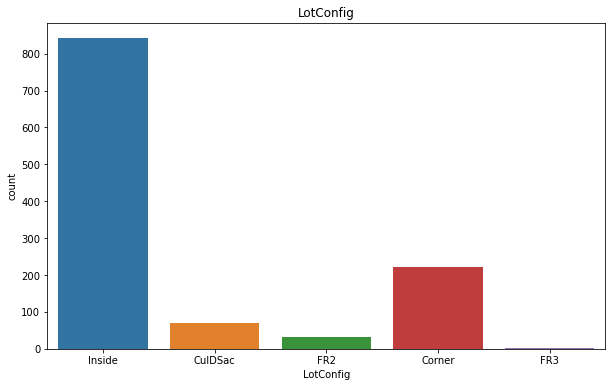

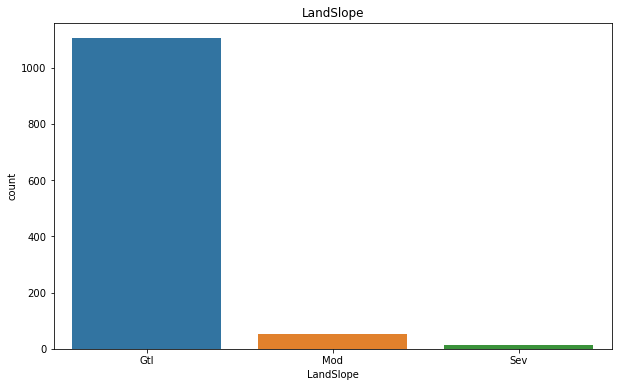

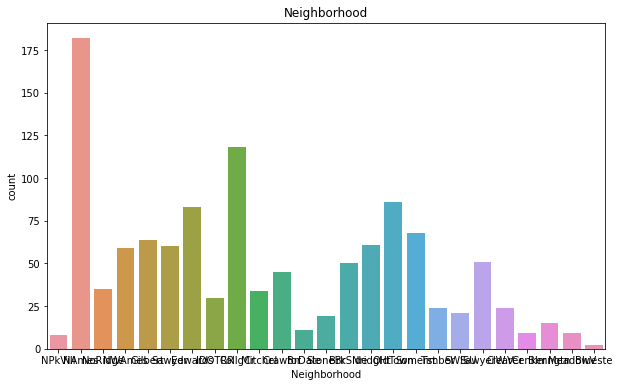

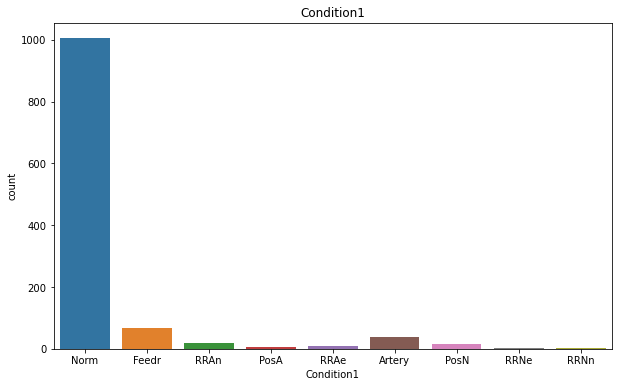

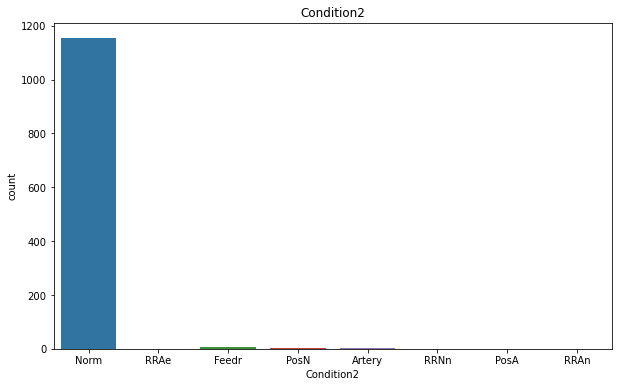

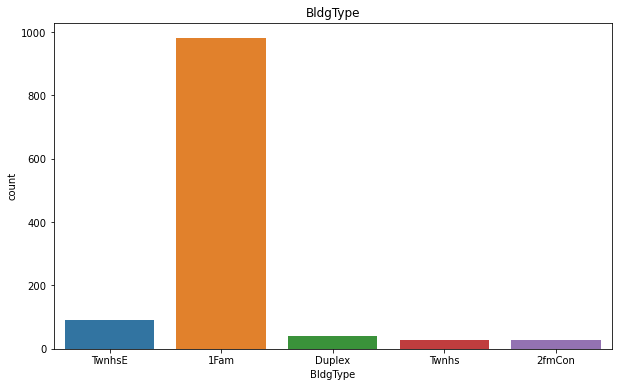

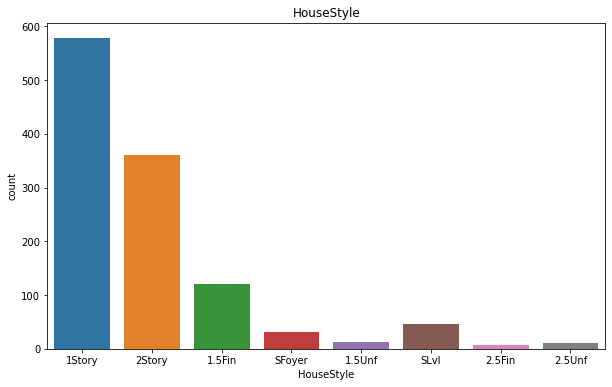

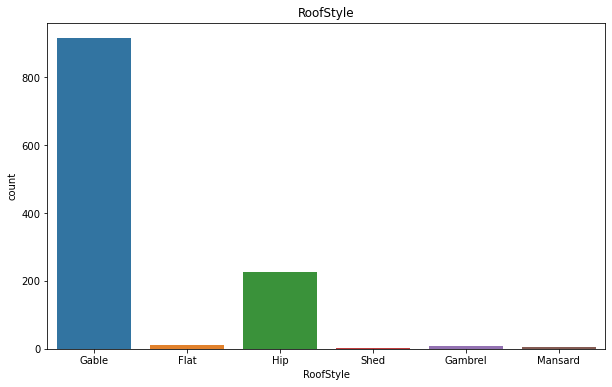

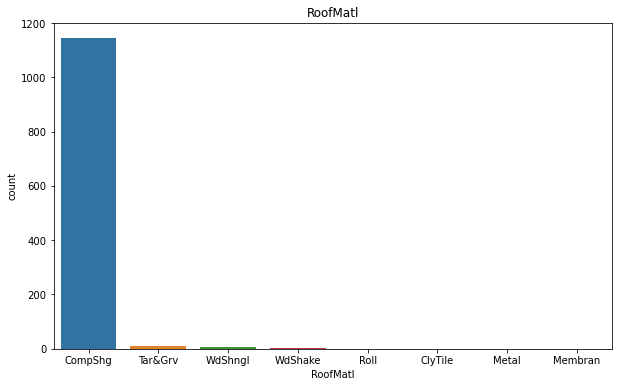

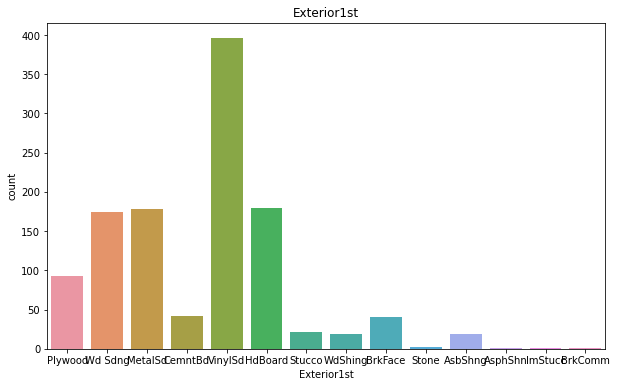

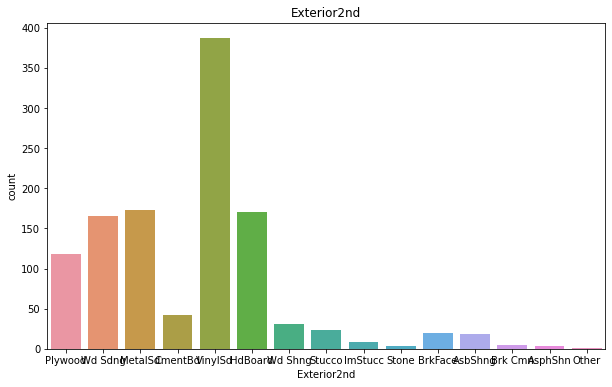

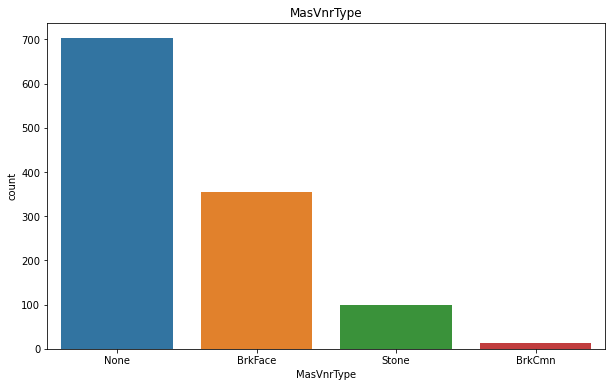

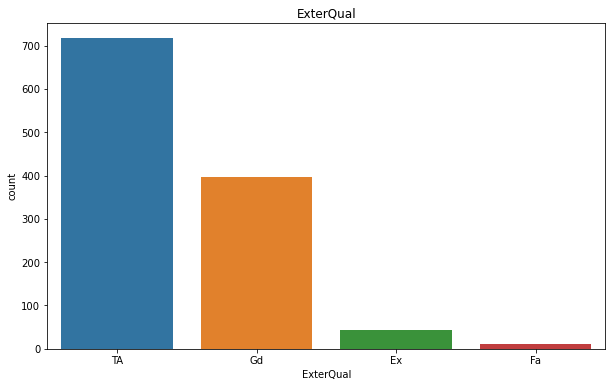

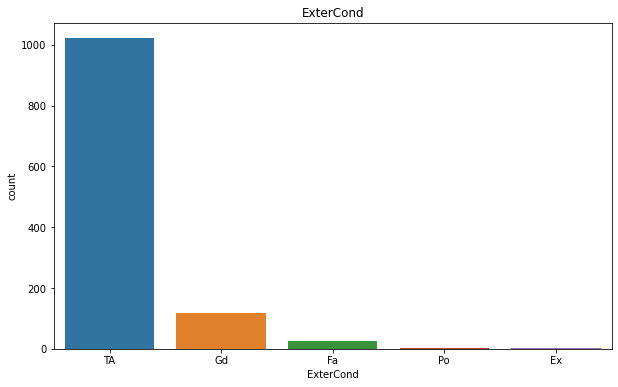

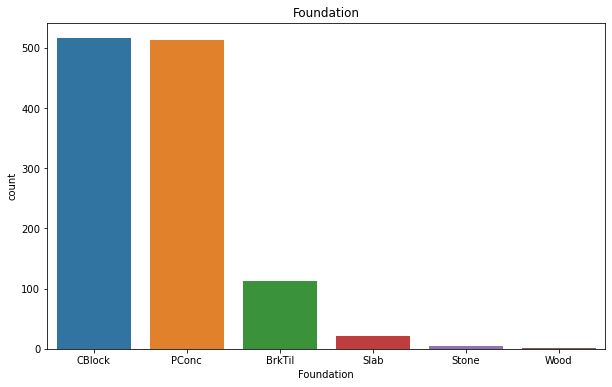

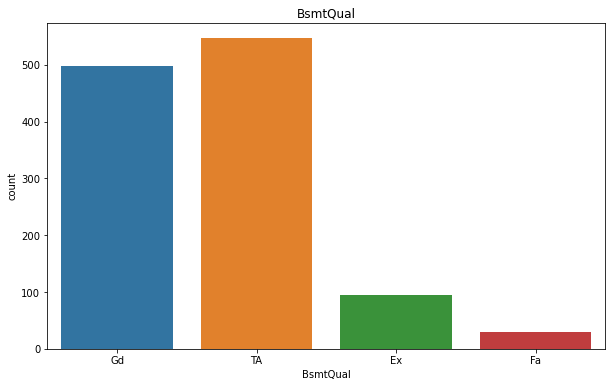

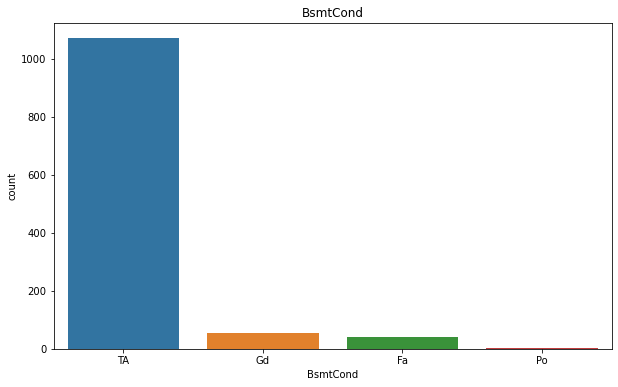

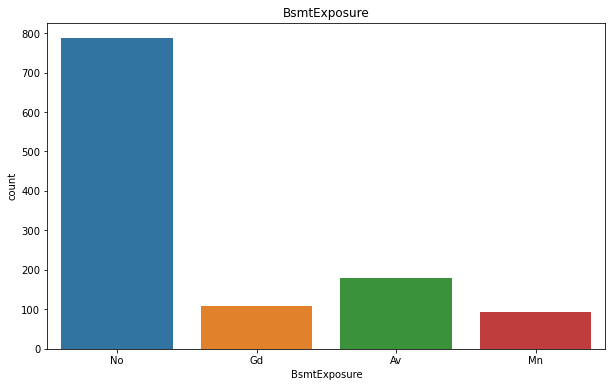

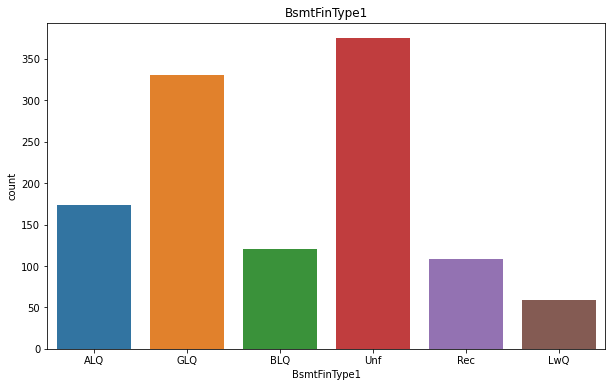

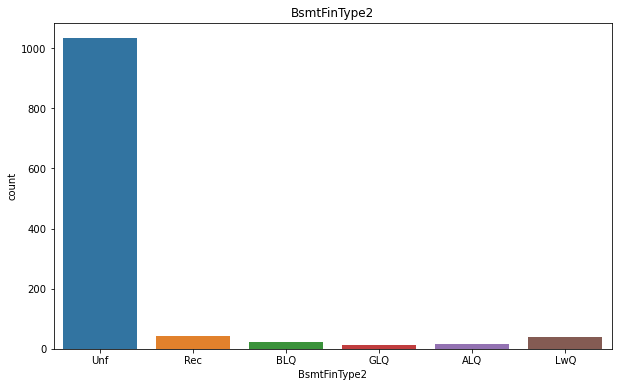

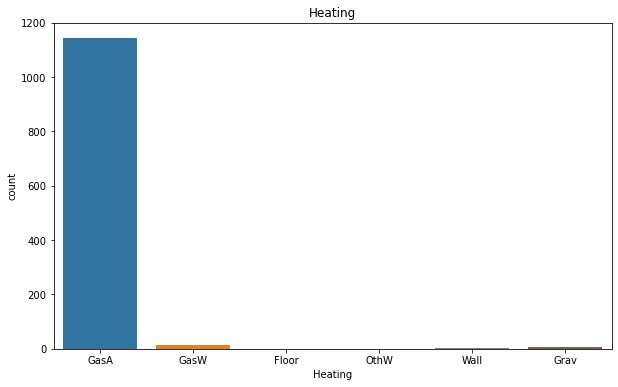

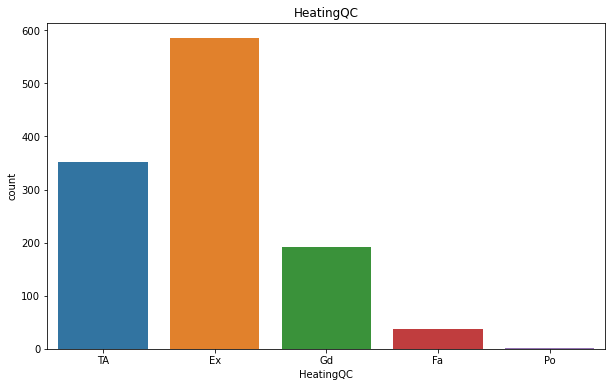

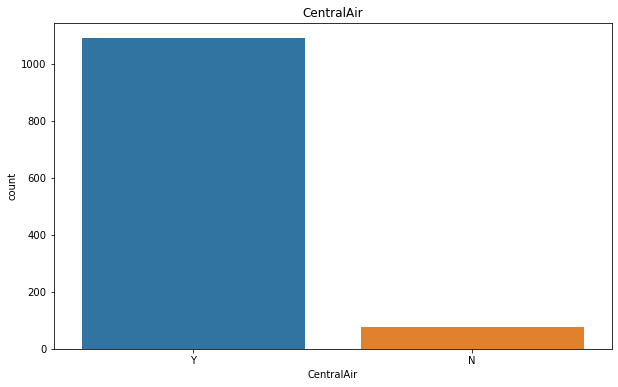

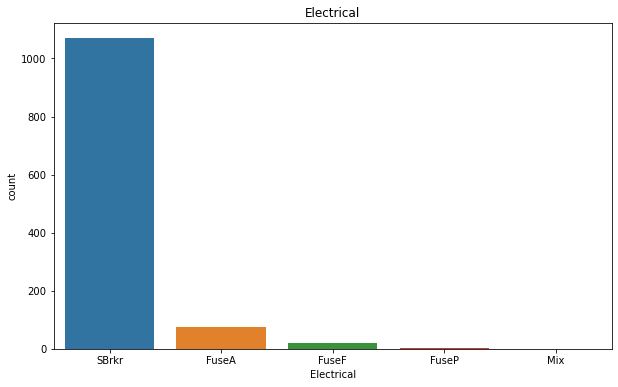

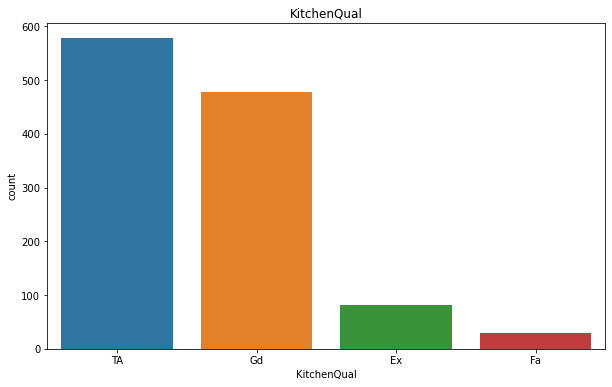

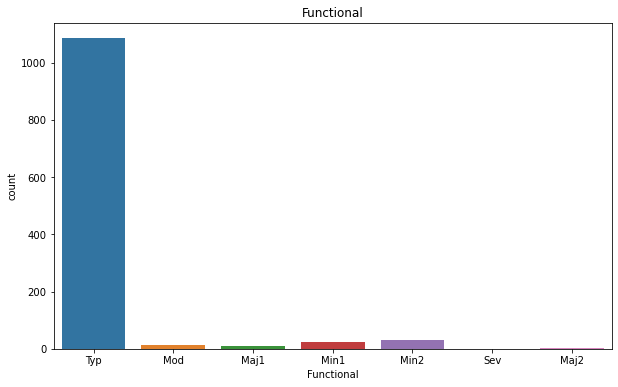

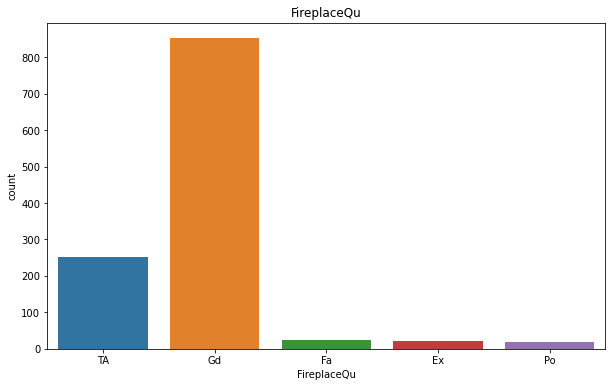

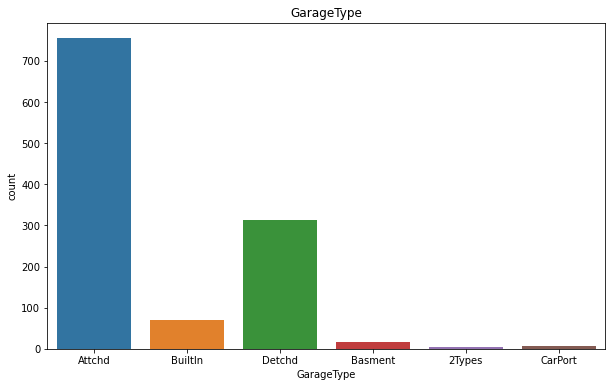

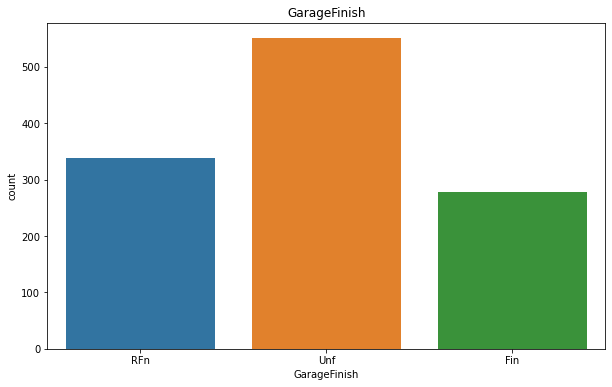

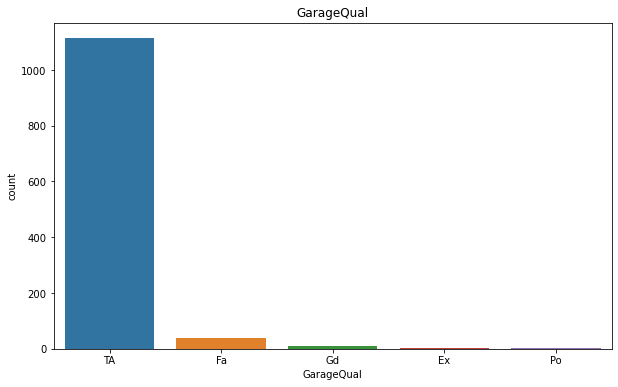

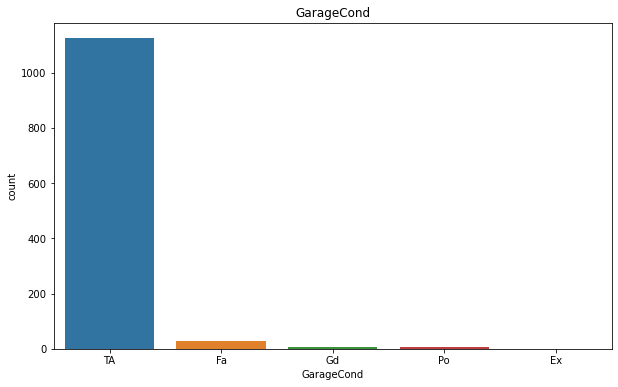

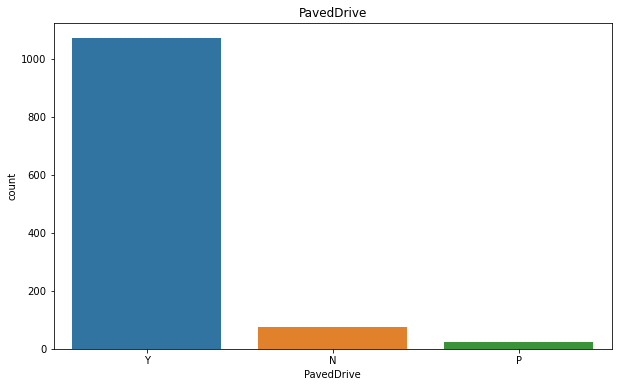

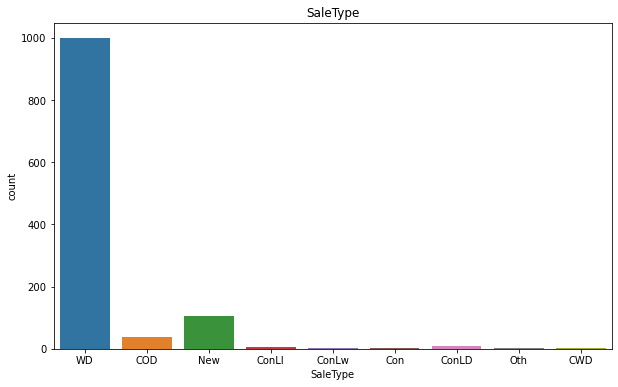

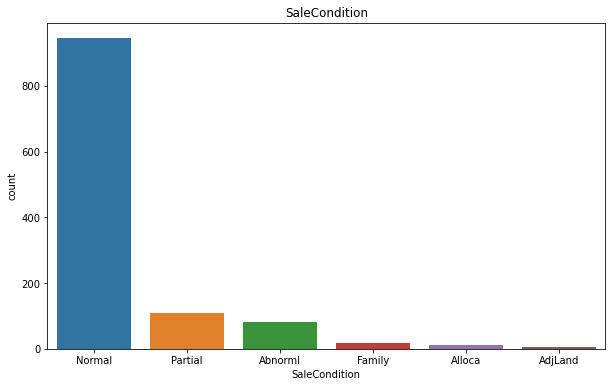

In [43]:
for i in df_train[train_catcol]:              
    plt.figure(figsize = (10,6))
    sns.countplot(df_train[i])
    plt.title(i)
    plt.show()

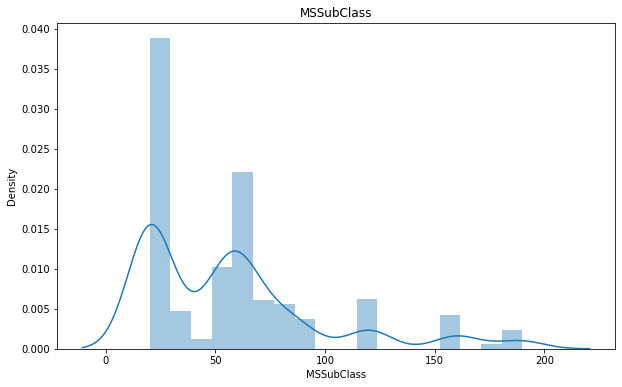

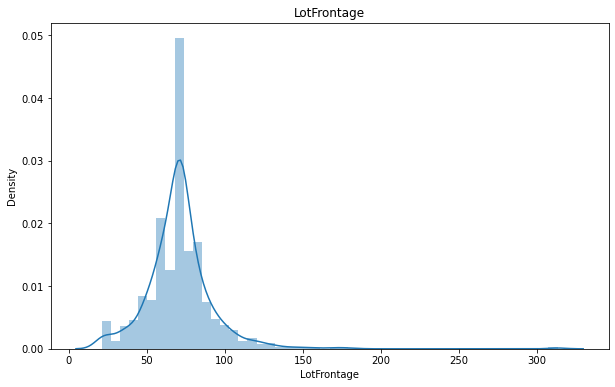

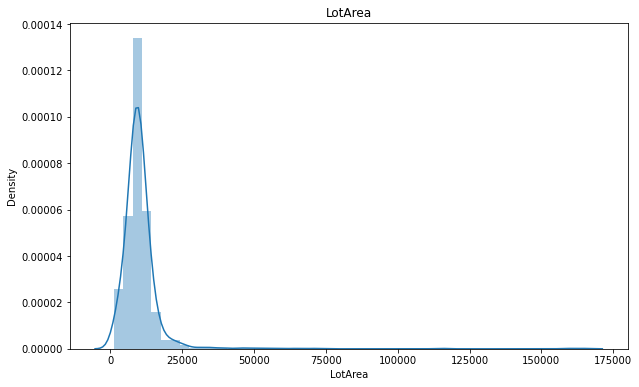

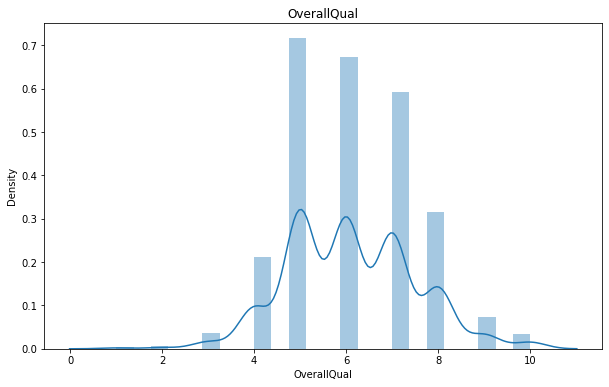

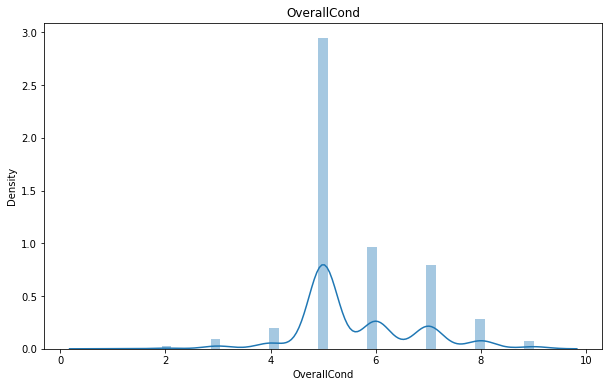

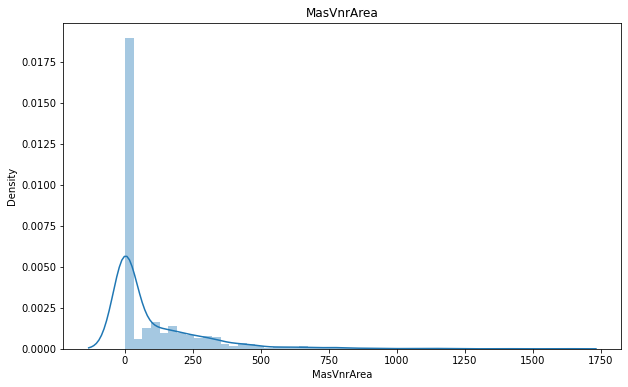

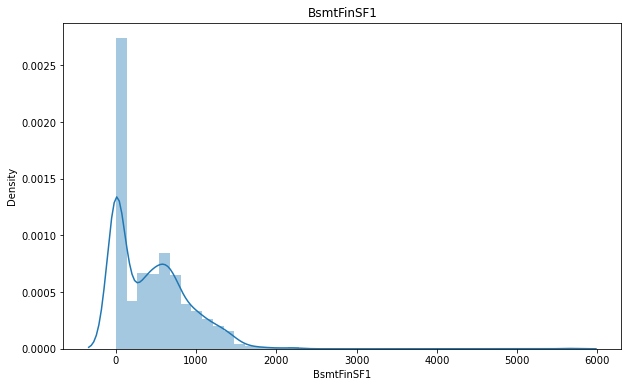

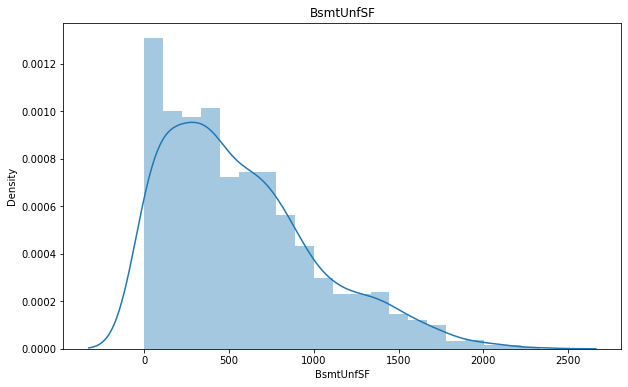

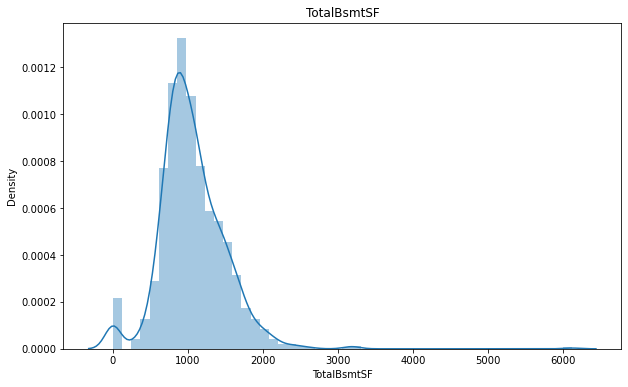

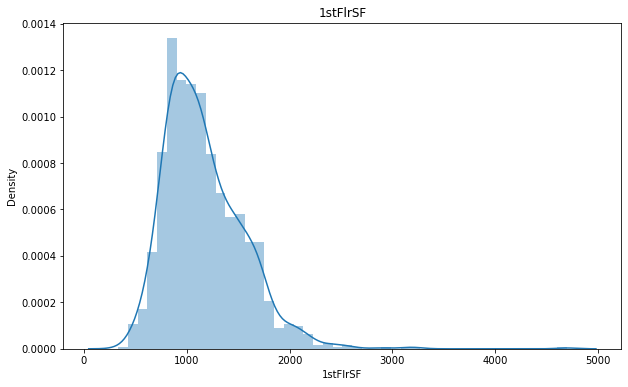

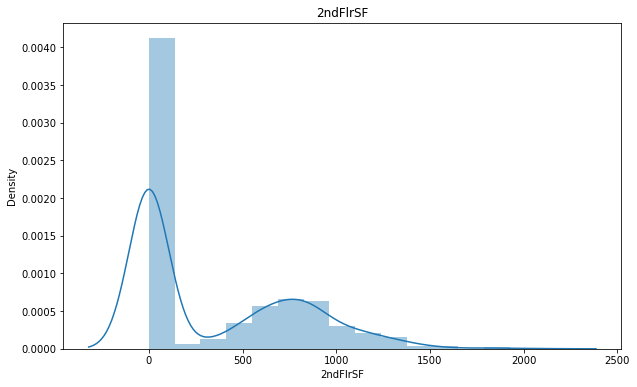

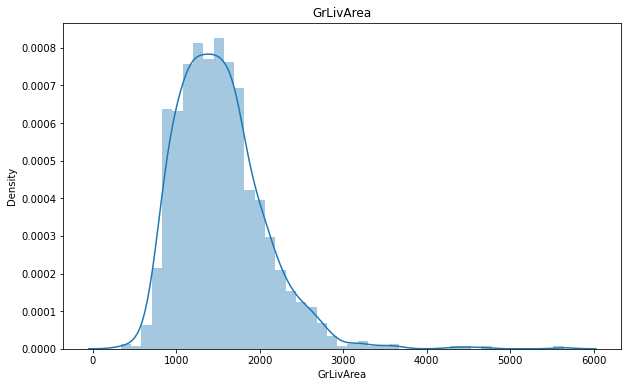

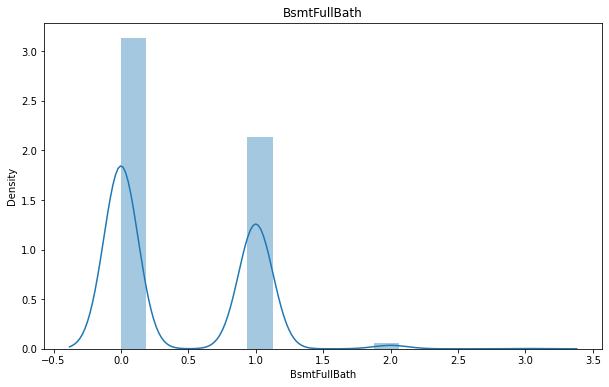

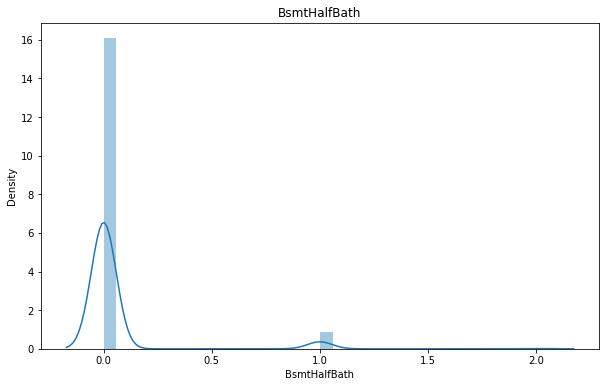

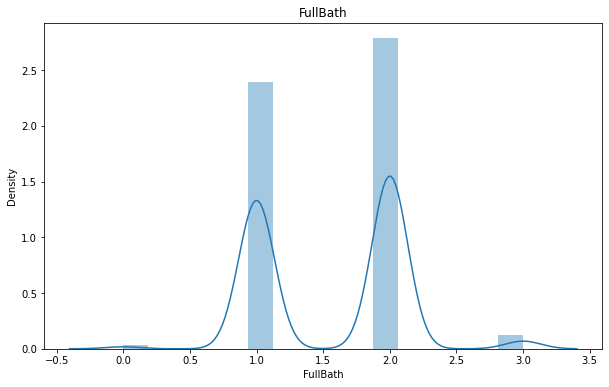

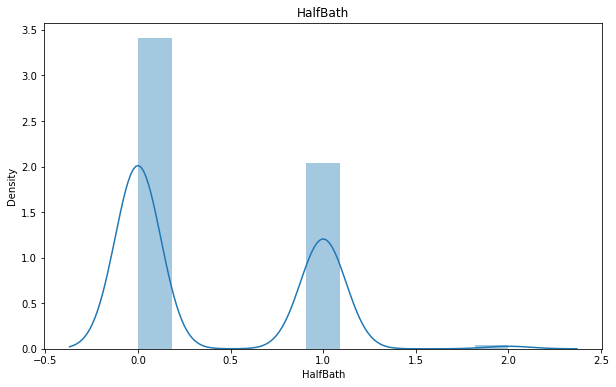

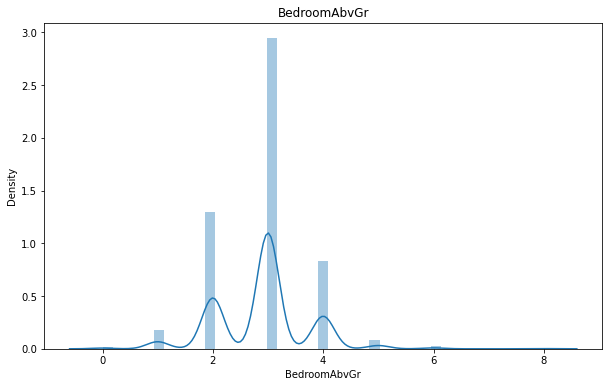

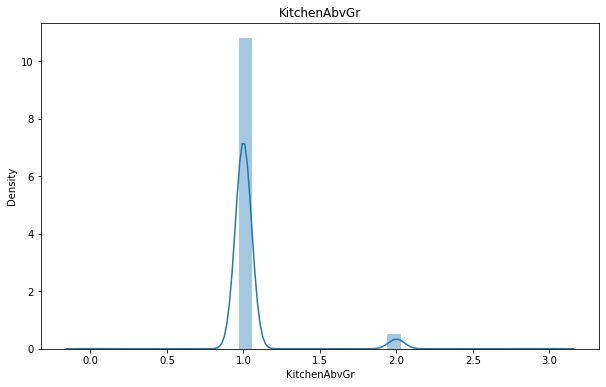

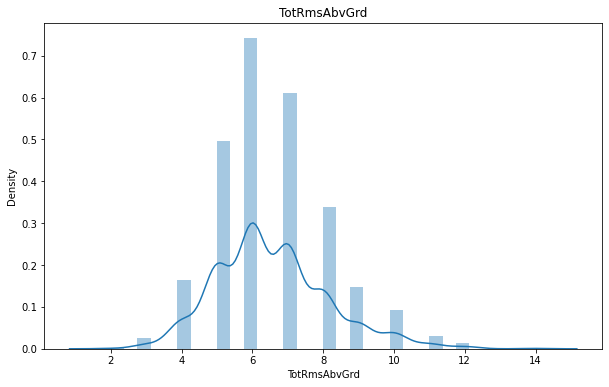

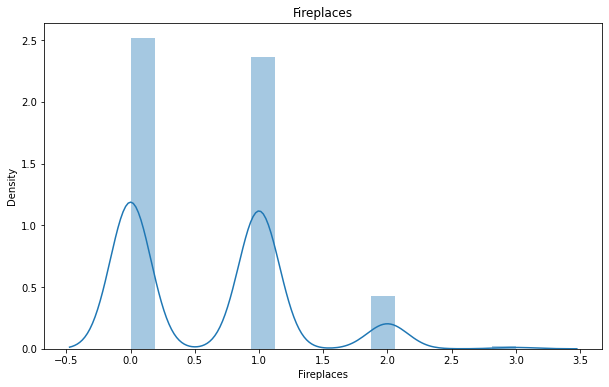

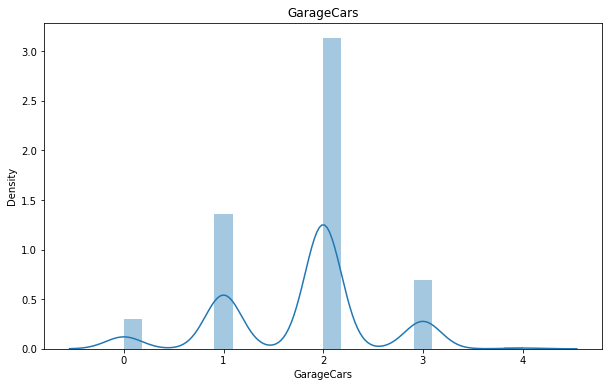

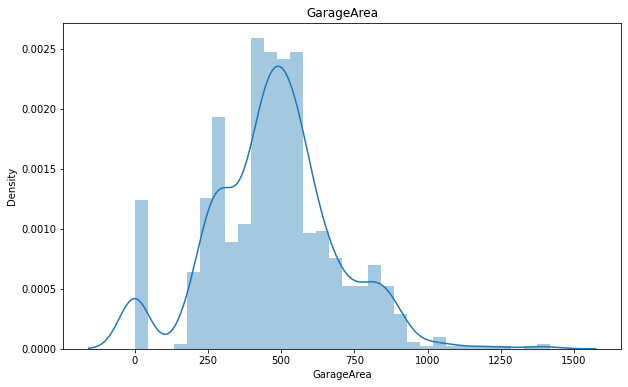

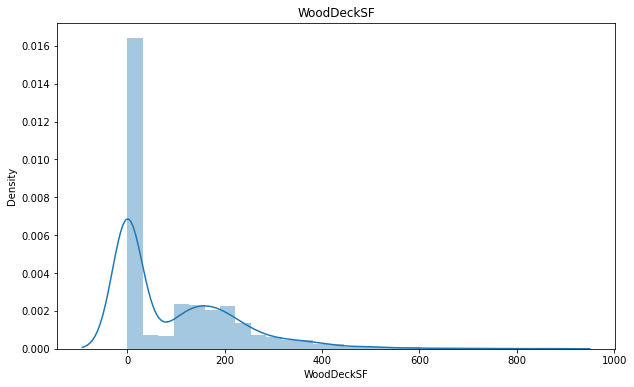

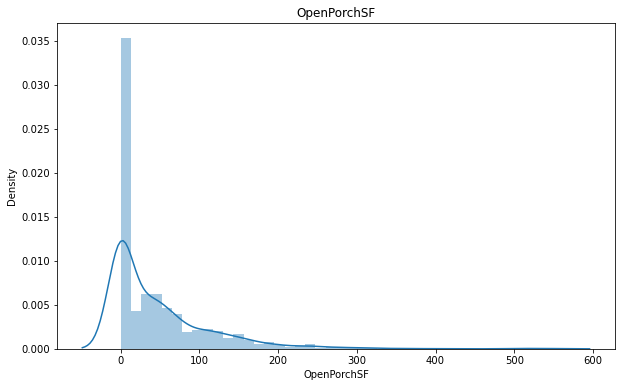

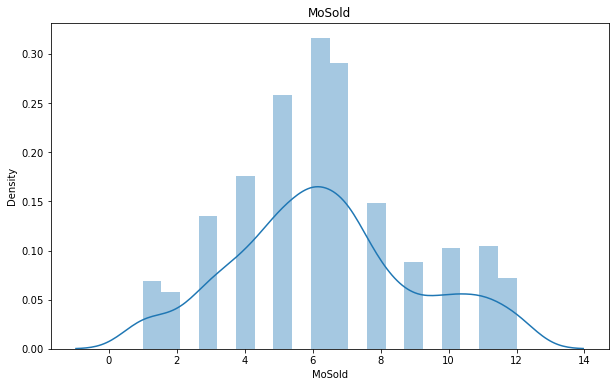

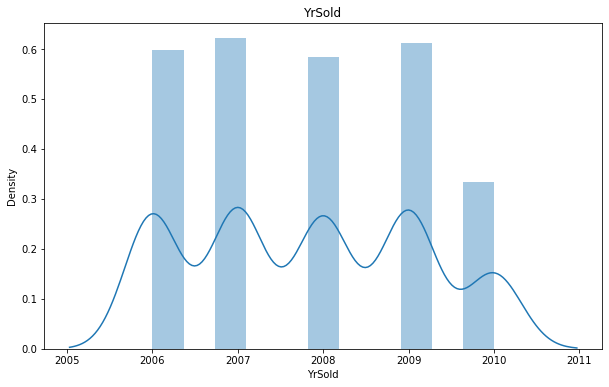

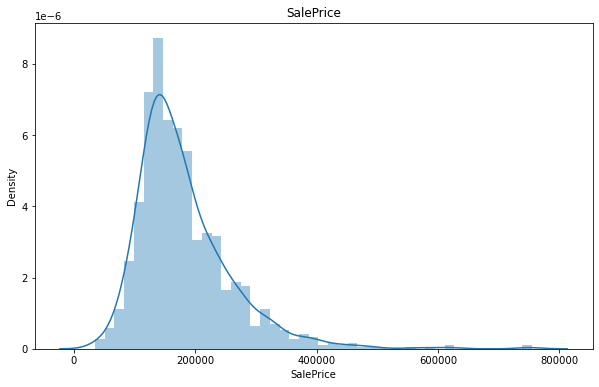

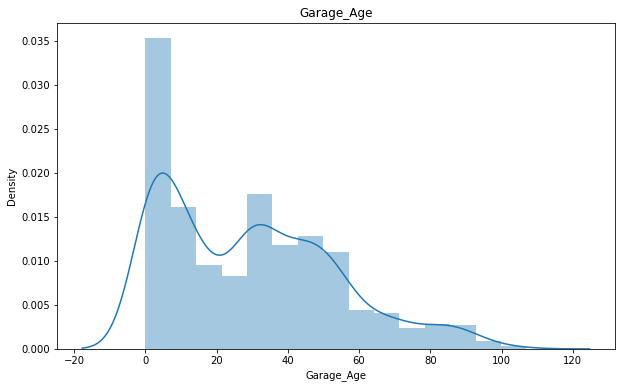

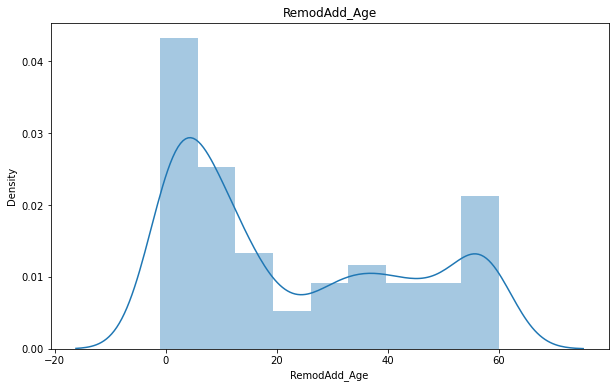

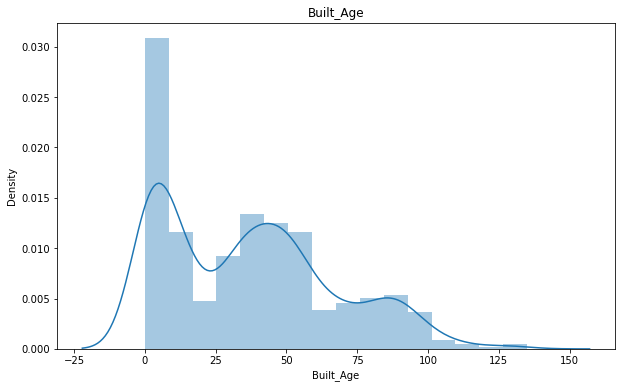

In [44]:
for i in df_train[train_numcol]:              
    plt.figure(figsize = (10,6))
    sns.distplot(df_train[i])
    plt.title(i)
    plt.show()

# Outliers in Train Dataset:

<AxesSubplot:>

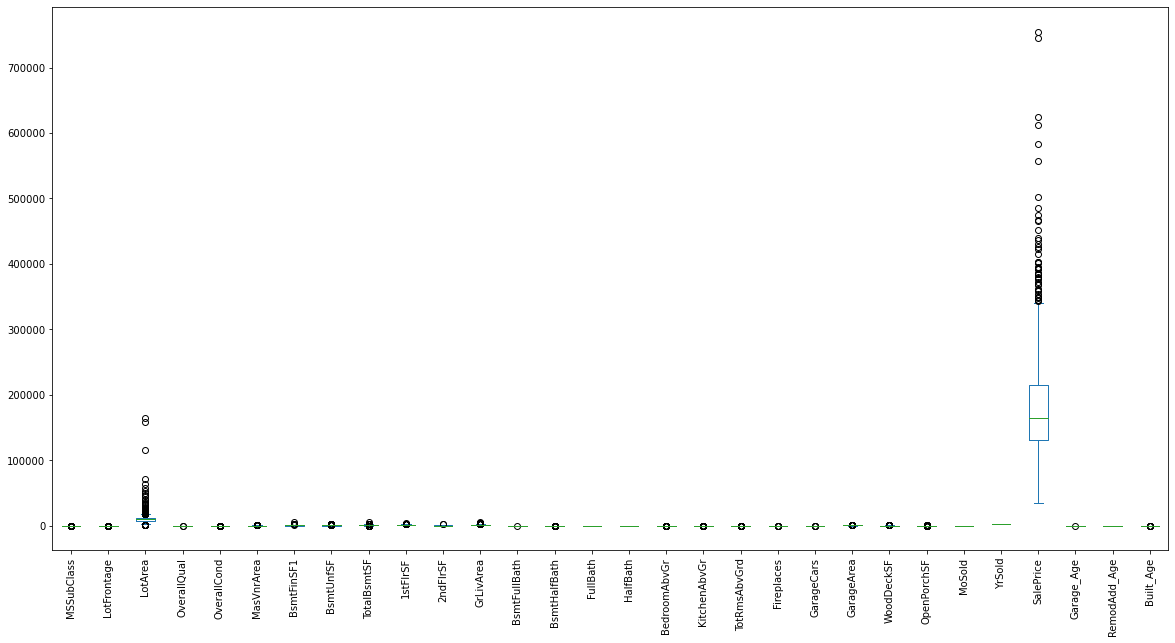

In [45]:
df_train.plot(kind='box',fontsize=10,figsize=(20,10),rot=90)

# Removing the Outliers:

using Z-score Method

In [46]:
col = df_train[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Built_Age', 'Garage_Age']]
from scipy.stats import zscore
z=np.abs(zscore(col))

In [47]:
df_newtrain = df_train[(z<3).all(axis=1)] 

In [48]:
df_train.shape

(1168, 68)

In [49]:
df_newtrain.shape

(947, 68)

In [50]:
#Percentage of Loss
loss=(1168-947)/1168*100

In [51]:
loss

18.92123287671233

loss is greater than 10% so let's try with percentile method.

Percentile Method:

In [52]:
for i in col:
    if df_train[i].dtypes !='object':
        percentile = df_train[i].quantile([0.01,0.98]).values
        df_train[i][df_train[i]<=percentile[0]] = percentile[0]
        df_train[i][df_train[i]>=percentile[1]] = percentile[1]

# Now checking for outliers in test dataset

<AxesSubplot:>

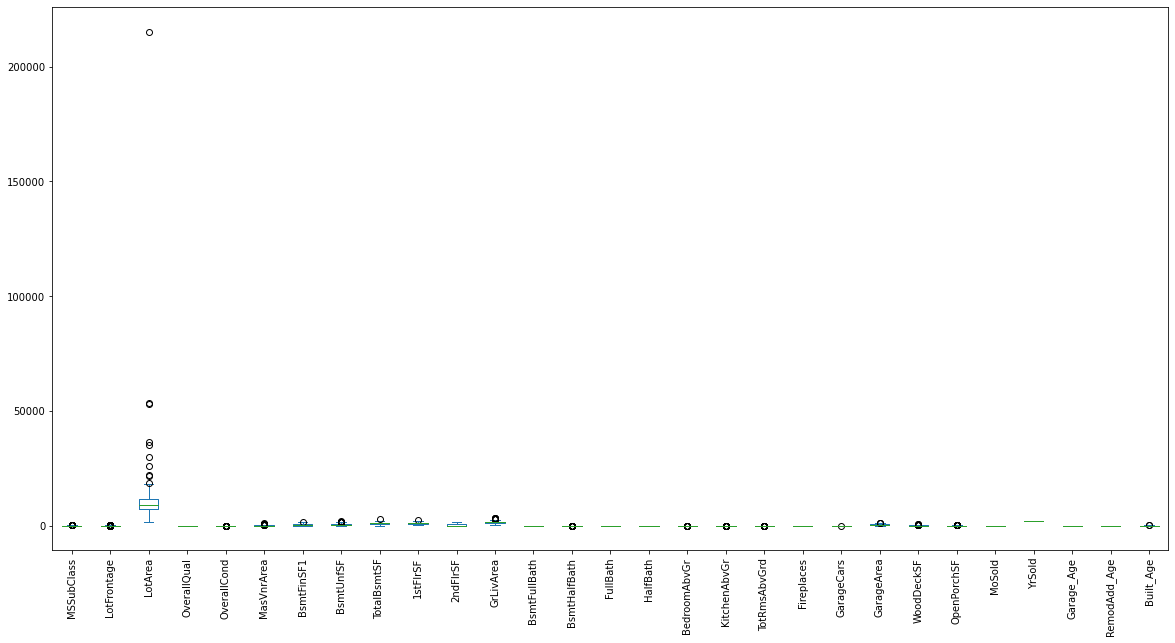

In [53]:
df_test.plot(kind='box',fontsize=10,figsize=(20,10),rot=90)

In [54]:
col_test = df_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond','MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Built_Age']]


In [55]:
#Let's use percentile method for test dataset also.
for j in col_test:
    if df_test[j].dtypes !='object':
        percentile = df_test[i].quantile([0.01,0.98]).values
        df_test[i][df_test[i]<=percentile[0]] = percentile[0]
        df_test[i][df_test[i]>=percentile[1]] = percentile[1]

# Skewness of Train Dataset:

In [56]:
df_train.skew()

MSSubClass      1.422019
LotFrontage     0.188060
LotArea         1.191912
OverallQual     0.175082
OverallCond     0.580714
MasVnrArea      1.873138
BsmtFinSF1      0.639523
BsmtUnfSF       0.777624
TotalBsmtSF     0.166773
1stFlrSF        0.645842
2ndFlrSF        0.717390
GrLivArea       0.592755
BsmtFullBath    0.355224
BsmtHalfBath    3.954345
FullBath        0.057809
HalfBath        0.656492
BedroomAbvGr   -0.145762
KitchenAbvGr    4.374289
TotRmsAbvGrd    0.443931
Fireplaces      0.552677
GarageCars     -0.434745
GarageArea     -0.135675
WoodDeckSF      1.053617
OpenPorchSF     1.513678
MoSold          0.220979
YrSold          0.115765
SalePrice       1.953878
Garage_Age      0.598350
RemodAdd_Age    0.495051
Built_Age       0.469054
dtype: float64

# Removing the Skewness:

In [57]:
sk_train = ["MSSubClass","LotArea","OverallCond","MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","HalfBath","KitchenAbvGr","Fireplaces","WoodDeckSF","OpenPorchSF","Garage_Age"]

In [58]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_train[sk_train] = scaler.fit_transform(df_train[sk_train].values)
df_train[sk_train].head()

MSSubClass   LotArea  OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
0    1.370435 -1.306083    -0.496528   -0.822896   -0.117054   0.916764   
1   -1.167999  1.356458     0.407009   -0.822896    0.395541   1.042594   
2    0.490047  0.113089    -0.496528   -0.822896    0.934402  -0.510359   
3   -1.167999  0.530989     0.407009    1.385487    0.803940   1.178365   
4   -1.167999  1.497522     1.234321    1.140684    1.189724  -0.230032   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtHalfBath  HalfBath  KitchenAbvGr  \
0 -0.481887 -0.871789  -1.281768     -0.238775 -0.782707           0.0   
1  2.082190 -0.871789   1.377184     -0.238775 -0.782707           0.0   
2  0.048689  1.177246   1.060650     -0.238775  1.268421           0.0   
3  1.665038 -0.871789   0.775546     -0.238775 -0.782707           0.0   
4  1.201931 -0.871789   0.322952      4.188040 -0.782707           0.0   

   Fireplaces  WoodDeckSF  OpenPorchSF  Garage_Age  
0    0.779453   -0.960144     1.423871    0.284230  
1    0.779453    0.783831     1.428474    0.520769  
2    0.779453    1.047285     1.208580   -0.652921  
3    0.779453   -0.960144     1.178672    0.389070  
4    0.779453    1.139237    -1.062308    0.354747

In [59]:
df_train.skew()

MSSubClass      0.064007
LotFrontage     0.188060
LotArea         0.077861
OverallQual     0.175082
OverallCond     0.048063
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
TotalBsmtSF     0.166773
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtFullBath    0.355224
BsmtHalfBath    3.954345
FullBath        0.057809
HalfBath        0.498003
BedroomAbvGr   -0.145762
KitchenAbvGr    0.000000
TotRmsAbvGrd    0.443931
Fireplaces      0.076595
GarageCars     -0.434745
GarageArea     -0.135675
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
MoSold          0.220979
YrSold          0.115765
SalePrice       1.953878
Garage_Age     -0.217650
RemodAdd_Age    0.495051
Built_Age       0.469054
dtype: float64

In [60]:
#dropping the columns with '0' skewness
df_train.drop("KitchenAbvGr",axis=1,inplace=True)

# Skewness of Test Dataset:

In [61]:
df_test.skew()

MSSubClass       1.358597
LotFrontage      0.466813
LotArea         12.781805
OverallQual      0.397312
OverallCond      1.209714
MasVnrArea       1.976804
BsmtFinSF1       0.739790
BsmtUnfSF        0.960708
TotalBsmtSF      0.519257
1stFlrSF         0.692047
2ndFlrSF         0.765511
GrLivArea        1.010586
BsmtFullBath     0.463685
BsmtHalfBath     3.544994
FullBath        -0.049800
HalfBath         0.758892
BedroomAbvGr     0.075315
KitchenAbvGr     4.849432
TotRmsAbvGrd     0.805535
Fireplaces       0.540164
GarageCars      -0.280324
GarageArea       0.133547
WoodDeckSF       1.708221
OpenPorchSF      2.185030
MoSold           0.186504
YrSold           0.018412
Garage_Age       0.650966
RemodAdd_Age     0.533693
Built_Age        0.756971
dtype: float64

In [62]:
sk_test= ["MSSubClass","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","HalfBath","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","WoodDeckSF","OpenPorchSF","Garage_Age","Built_Age"]

In [63]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_test[sk_test] = scaler.fit_transform(df_test[sk_test].values)
df_test[sk_test].head()

MSSubClass   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0   -1.149768  0.842656    1.182923    1.205140   0.455087  1.814725   
1    1.337666 -0.739104   -0.846534    1.064798  -0.841820  0.726749   
2   -1.149768  0.524304   -0.846534   -1.375716   2.127575  1.586900   
3    0.705404  0.548484   -0.846534    0.235689  -0.093395 -0.705442   
4    0.507343  0.897263    0.952580   -1.375716   0.870427 -0.584696   

   2ndFlrSF  GrLivArea  BsmtHalfBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
0 -0.870294   0.943726     -0.263813 -0.738058 -3.122502e-17      0.961793   
1 -0.870294  -0.077517     -0.263813 -0.738058 -3.122502e-17     -1.618327   
2 -0.870294   0.729670     -0.263813 -0.738058 -3.122502e-17      0.447622   
3  1.137231   0.334155     -0.263813  1.349285 -3.122502e-17      0.447622   
4  1.211129   0.960645     -0.263813  1.349285 -3.122502e-17      1.420534   

   Fireplaces  WoodDeckSF  OpenPorchSF  Garage_Age  Built_Age  
0    0.808861    1.119038     0.718308   -1.398705  -1.416532  
1    0.808861    0.813787    -1.111540    0.158368  -0.005055  
2    0.808861    1.153748     1.278346   -0.765449  -0.824418  
3    0.808861   -0.913570    -1.111540    1.411909   1.052874  
4    0.808861    0.954066     0.218396   -1.572876  -1.585761

# Encoding Train Dataset:

In [64]:
df_train.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0    1.370435       RL     70.98847 -1.306083   Pave      IR1         Lvl   
1   -1.167999       RL     95.00000  1.356458   Pave      IR1         Lvl   
2    0.490047       RL     92.00000  0.113089   Pave      IR1         Lvl   
3   -1.167999       RL    105.00000  0.530989   Pave      IR1         Lvl   
4   -1.167999       RL     70.98847  1.497522   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6    -0.496528     Gable  CompShg     Plywood     Plywood   
1            8     0.407009      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7    -0.496528     Gable  CompShg     MetalSd     MetalSd   
3            6     0.407009       Hip  CompShg     Plywood     Plywood   
4            6     1.234321     Gable  CompShg     CemntBd     CmentBd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None   -0.822896        TA        TA     CBlock       Gd       TA   
1       None   -0.822896        Gd        Gd      PConc       TA       Gd   
2       None   -0.822896        Gd        TA      PConc       Gd       TA   
3    BrkFace    1.385487        TA        TA     CBlock       Gd       TA   
4      Stone    1.140684        Gd        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          ALQ   -0.117054          Unf   0.916764      1078.00   
1           Gd          ALQ    0.395541          Rec   1.042594      2025.14   
2           Av          GLQ    0.934402          Unf  -0.510359      1117.00   
3           No          BLQ    0.803940          Unf   1.178365      1844.00   
4           No          ALQ    1.189724          Unf  -0.230032      1602.00   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr -0.481887 -0.871789  -1.281768   
1    GasA        Ex          Y      SBrkr  2.082190 -0.871789   1.377184   
2    GasA        Ex          Y      SBrkr  0.048689  1.177246   1.060650   
3    GasA        Ex          Y      SBrkr  1.665038 -0.871789   0.775546   
4    GasA        Gd          Y      SBrkr  1.201931 -0.871789   0.322952   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  \
0             0     -0.238775         2 -0.782707           2.0          TA   
1             1     -0.238775         2 -0.782707           4.0          Gd   
2             1     -0.238775         2  1.268421           3.0          TA   
3             0     -0.238775         2 -0.782707           3.0          TA   
4             0      4.188040         2 -0.782707           3.0          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0           5.0        Typ    0.779453          TA     Attchd          RFn   
1           8.0        Typ    0.779453          TA     Attchd          Unf   
2           8.0        Typ    0.779453          TA     Attchd          Unf   
3           7.0        Typ    0.779453          TA     Attchd          RFn   
4           8.0        Typ    0.779453          TA     Attchd          Fin   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0           2       440.0         TA         TA          Y   -0.960144   
1           2       621.0         TA         TA          Y    0.783831   
2           2       455.0         TA         TA

In [65]:
# Checking for categorical columns
catcol_train=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=='object':
        catcol_train.append(i)

In [66]:
catcol_train

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [67]:
#encoding of train dataset
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df_train.columns:
    if df_train[i].dtypes=='object':
        df_train[i]=oe.fit_transform(df_train[i].values.reshape(-1,1))

In [68]:
#encoding of test dataset
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=oe.fit_transform(df_test[i].values.reshape(-1,1))

# Correlation:

In [69]:
corr=df_train.corr()

In [70]:
corr

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.026898    -0.316274 -0.312939 -0.017924   
MSZoning         0.026898  1.000000    -0.084834 -0.058912  0.140215   
LotFrontage     -0.316274 -0.084834     1.000000  0.596143 -0.044573   
LotArea         -0.312939 -0.058912     0.596143  1.000000 -0.072669   
Street          -0.017924  0.140215    -0.044573 -0.072669  1.000000   
LotShape         0.067516  0.053655    -0.157341 -0.287003 -0.012941   
LandContour     -0.030467  0.001175    -0.016620 -0.074834  0.105226   
LotConfig        0.057130 -0.027246    -0.201691 -0.198998  0.000153   
LandSlope       -0.016595 -0.023952     0.023253  0.176280 -0.141572   
Neighborhood    -0.011619 -0.251833     0.091671  0.075420  0.001420   
Condition1      -0.039101 -0.025651    -0.022579  0.069366  0.002189   
Condition2      -0.031881  0.031959     0.011970  0.056741  0.001406   
BldgType         0.586409 -0.024776    -0.467073 -0.524128 -0.013606   
HouseStyle       0.481353 -0.110991     0.057902  0.005503  0.016793   
OverallQual      0.122241 -0.134037     0.230687  0.190547  0.057140   
OverallCond     -0.032376  0.182610    -0.049125  0.010869  0.030543   
RoofStyle       -0.138069  0.000913     0.168101  0.119446 -0.006875   
RoofMatl        -0.028166  0.009719     0.063294  0.220463  0.007889   
Exterior1st     -0.048778 -0.012037     0.079942  0.079181  0.012482   
Exterior2nd     -0.069930  0.005548     0.108934  0.095689  0.014618   
MasVnrType      -0.028288 -0.033521    -0.066054 -0.019842  0.000822   
MasVnrArea       0.004875 -0.037361     0.166180  0.076589  0.020075   
ExterQual       -0.039219  0.184815    -0.167981 -0.104632  0.044509   
ExterCond        0.002040 -0.099269     0.046403 -0.013921  0.017738   
Foundation       0.048143 -0.244844     0.090652  0.009319  0.032701   
BsmtQual        -0.066777  0.123822    -0.175658 -0.123151 -0.031959   
BsmtCond        -0.032104  0.002336     0.050824 -0.006375 -0.017190   
BsmtExposure    -0.060011  0.037414    -0.121117 -0.144857  0.065253   
BsmtFinType1     0.084234  0.021518    -0.028977 -0.043423 -0.006420   
BsmtFinSF1      -0.100436 -0.036041     0.087060  0.119301  0.008924   
BsmtFinType2     0.056615 -0.031322    -0.015941 -0.073788  0.045208   
BsmtUnfSF       -0.116225 -0.032954     0.130111  0.052521  0.030988   
TotalBsmtSF     -0.293377 -0.065060     0.318263  0.332367  0.016841   
Heating          0.071533  0.051188    -0.036713 -0.021160  0.006981   
HeatingQC       -0.025739  0.119852    -0.066560 -0.022308 -0.047968   
CentralAir      -0.111572 -0.015887     0.087970  0.073866  0.043024   
Electrical       0.036332 -0.079205     0.073880  0.053827  0.038720   
1stFlrSF        -0.312472 -0.037611     0.394878  0.452791  0.009913   
2ndFlrSF         0.558561 -0.016193    -0.036998  0.009290  0.026241   
GrLivArea        0.230677 -0.086858     0.318133  0.397820  0.052837   
BsmtFullBath    -0.067705 -0.009900     0.070859  0.108691 -0.010398   
BsmtHalfBath     0.010020  0.006809     0.011408  0.043299  0.013997   
FullBath         0.197635 -0.188837     0.180823  0.187219  0.033208   
HalfBath         0.295003 -0.125164     0.049731  0.061575  0.045883   
BedroomAbvGr     0.078793 -0.000610     0.278173  0.297515  0.028722   
KitchenQual     -0.037256  0.111689    -0.162936 -0.113870 -0.012056   
TotRmsAbvGrd     0.192707 -0.024508     0.323070  0.369388  0.039782   
Functional       0.037758 -0.091684     0.037977 -0.025038 -0.015309   
Fireplaces       0.029802  0.009349     0.227523  0.328380  0.021069   
FireplaceQu      0.076060  0.005628     0.096082  0.130931  0.025218   
GarageType       0.104343  0.125155    -0.243693 -0.201895 -0.000824   
GarageFinish    -0.023714  0.162566    -0.202471 -0.155464 -0.001178   
GarageCars       0.000675 -0.130963     0.297190  0.272560  0.001838   
GarageArea      -0.075152 -0.163414     0.334422  0.319552 -0.002976   
GarageQual      -0.045754 -0.168881     0.041304  0.004

<AxesSubplot:>

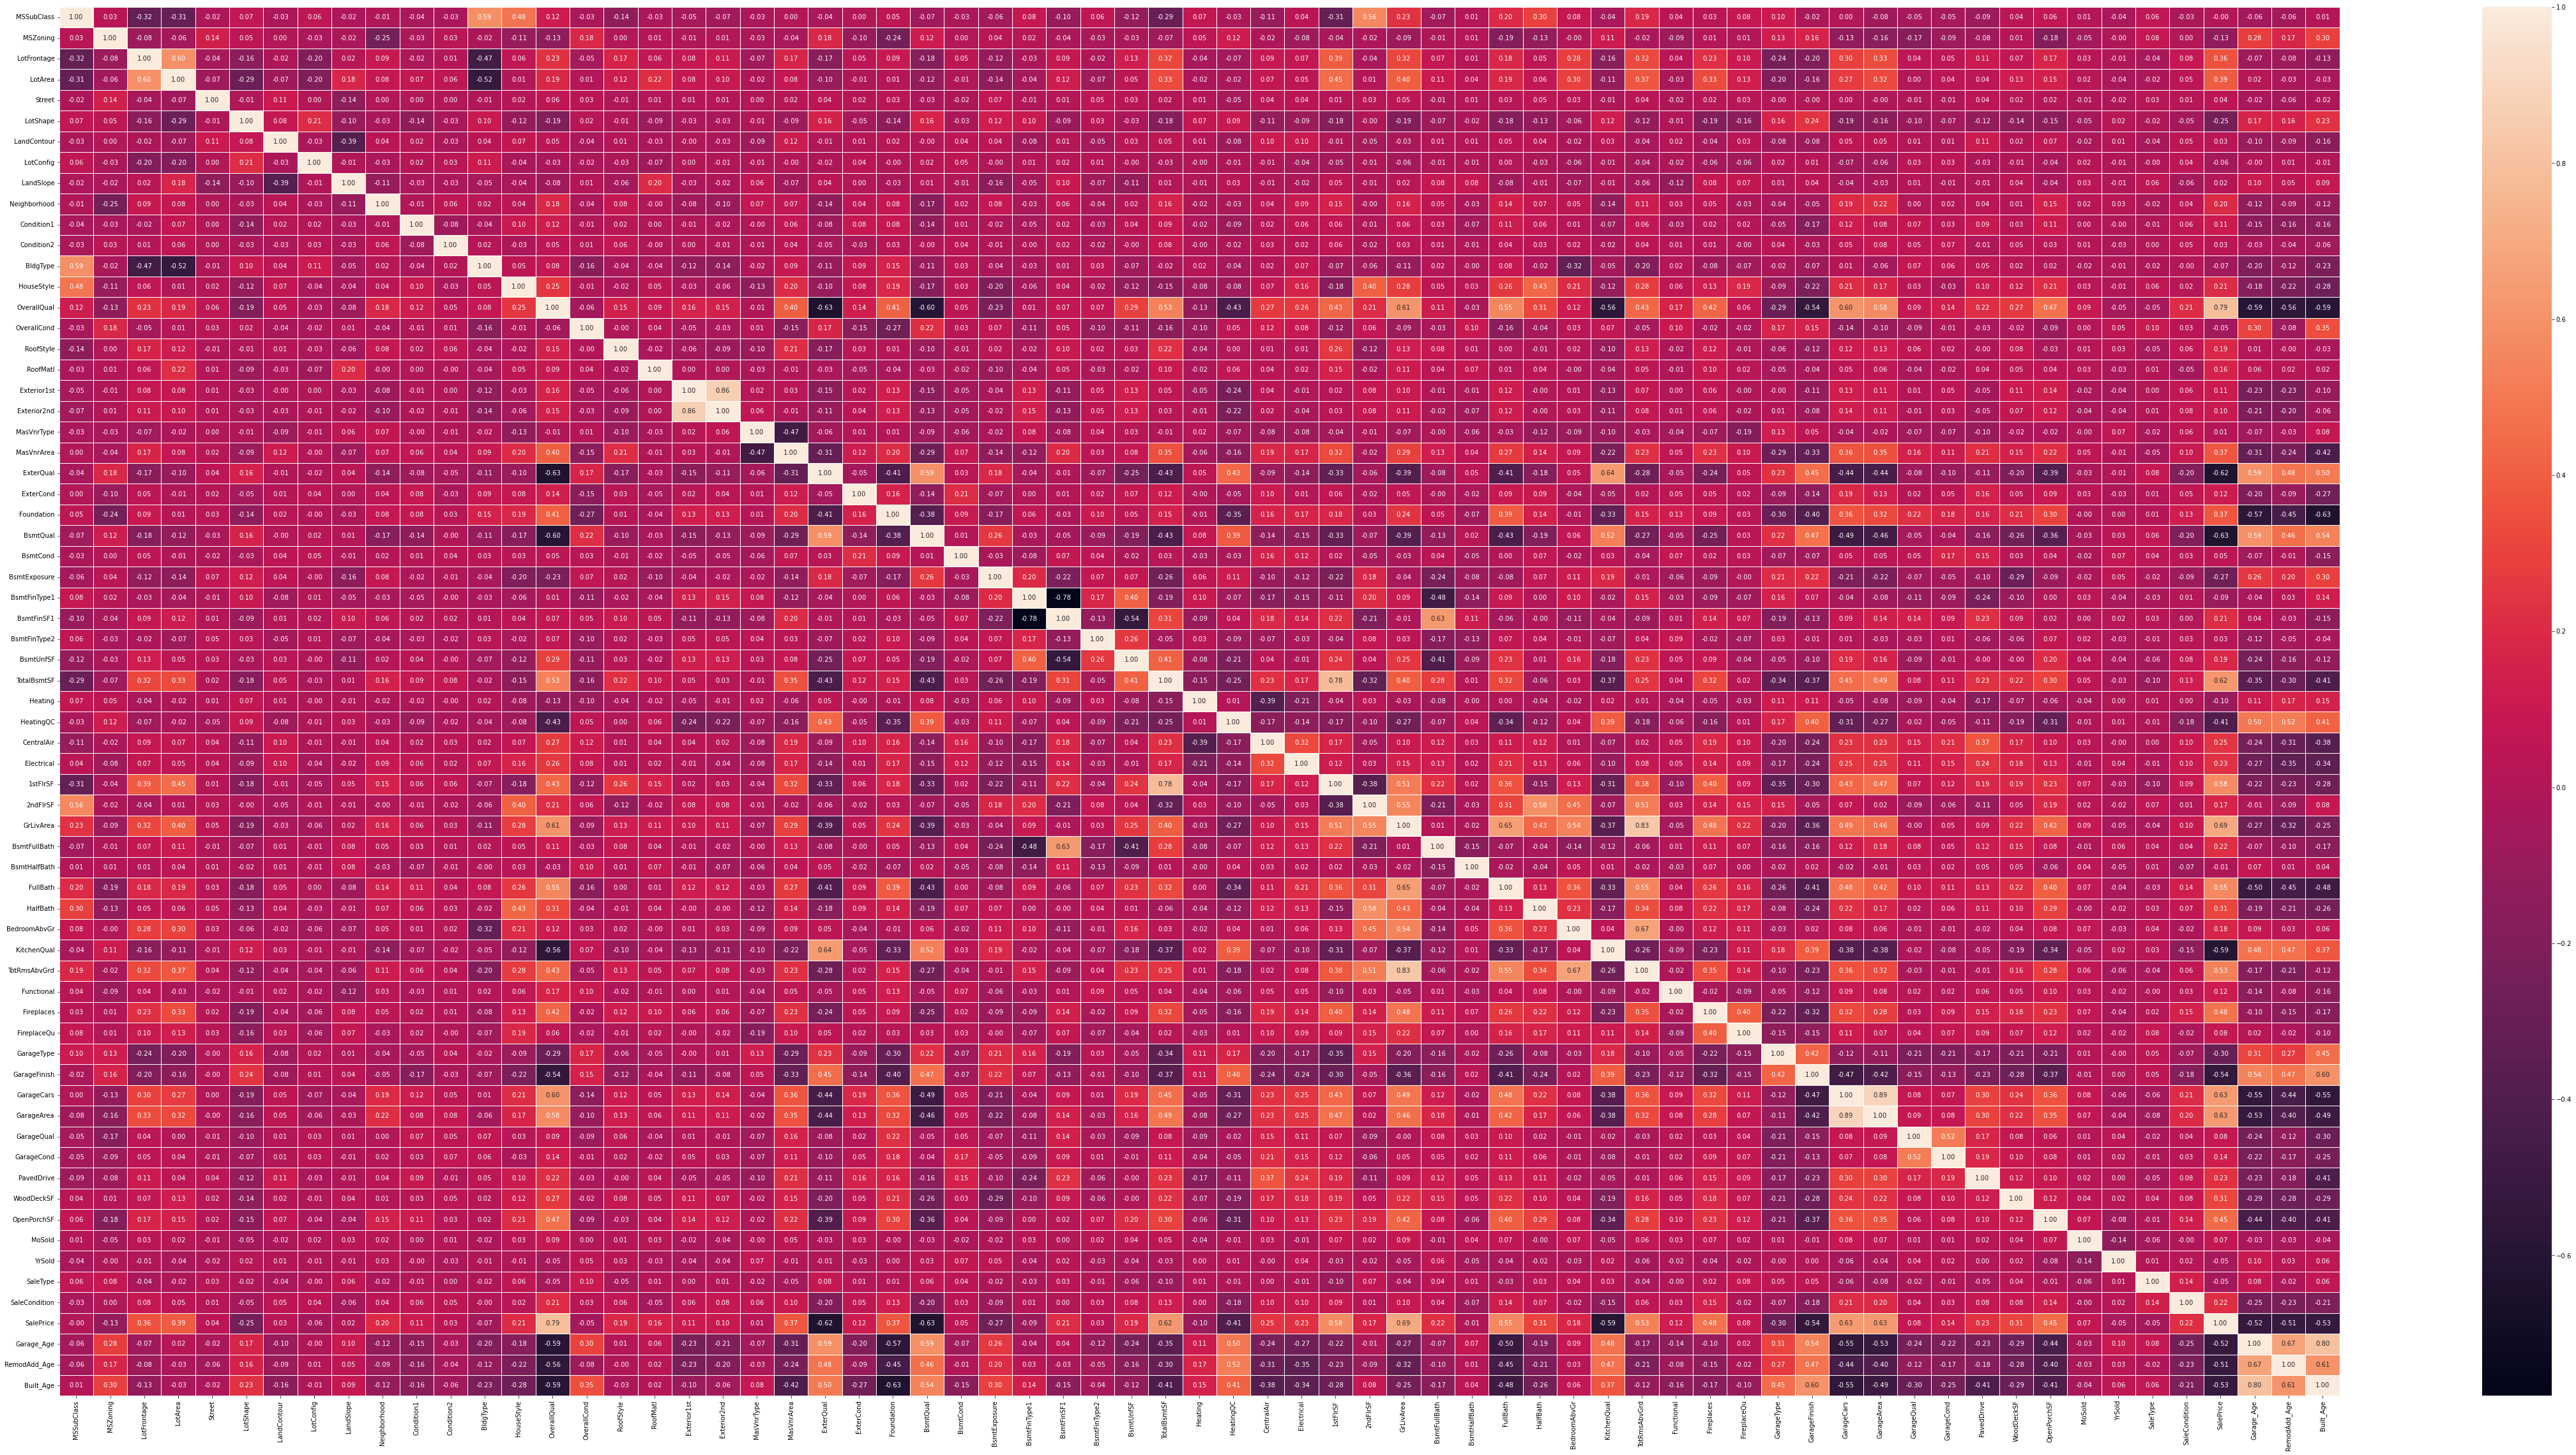

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80,40))
sns.heatmap(df_train.corr(),annot=True,linewidth=0.5,fmt='.2f')

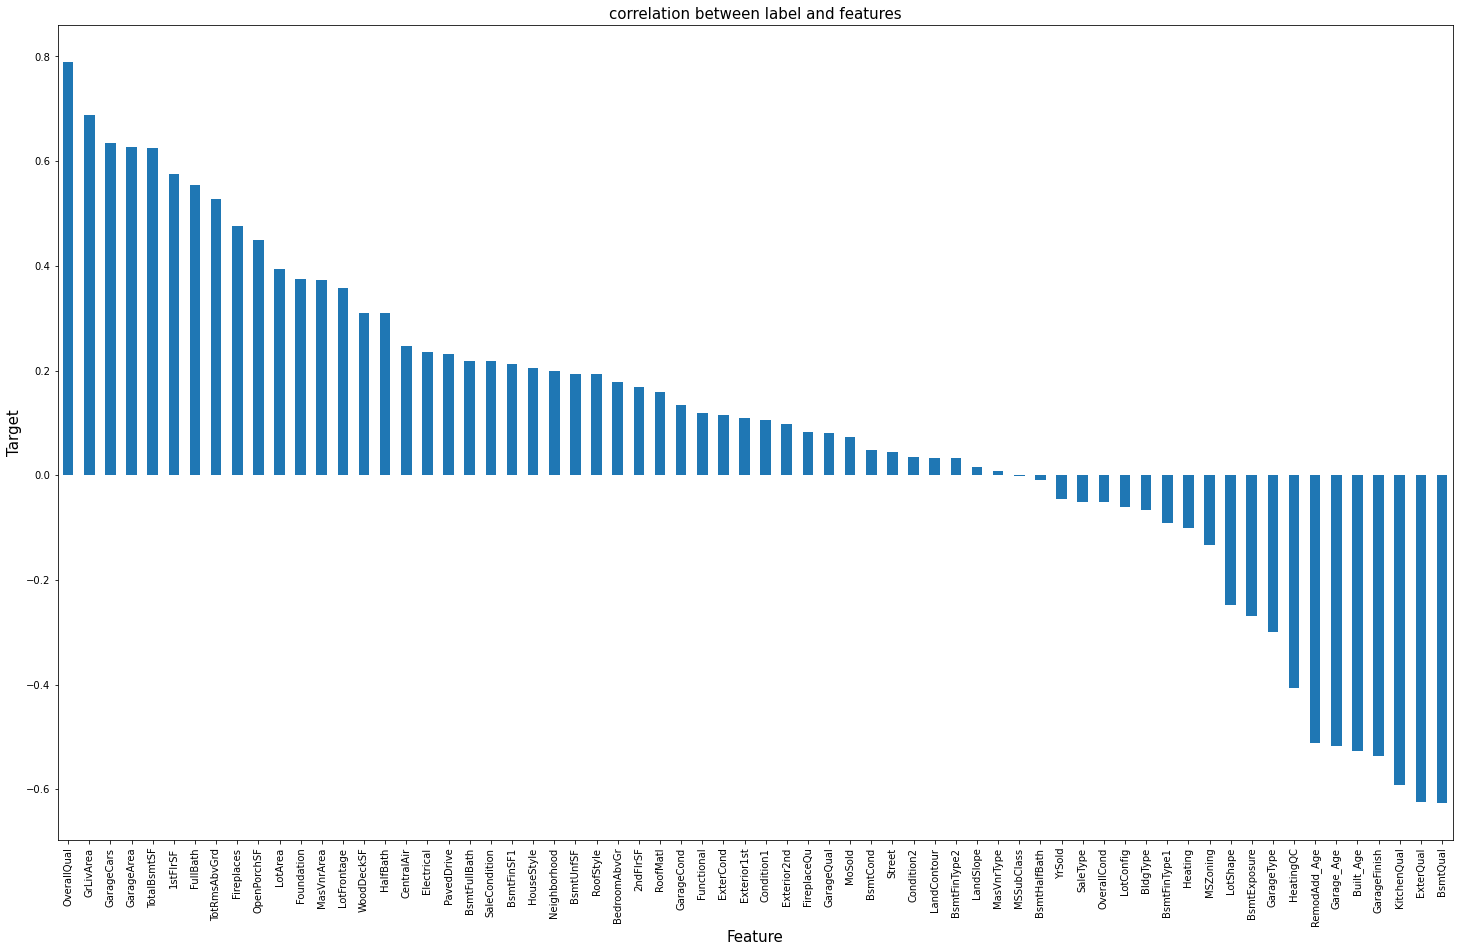

In [72]:
plt.figure(figsize=(25,15))
df_train.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and features',fontsize=15)
plt.show()

# Correlation of Test Dataset:

In [73]:
cor_test=df_test.corr()

<AxesSubplot:>

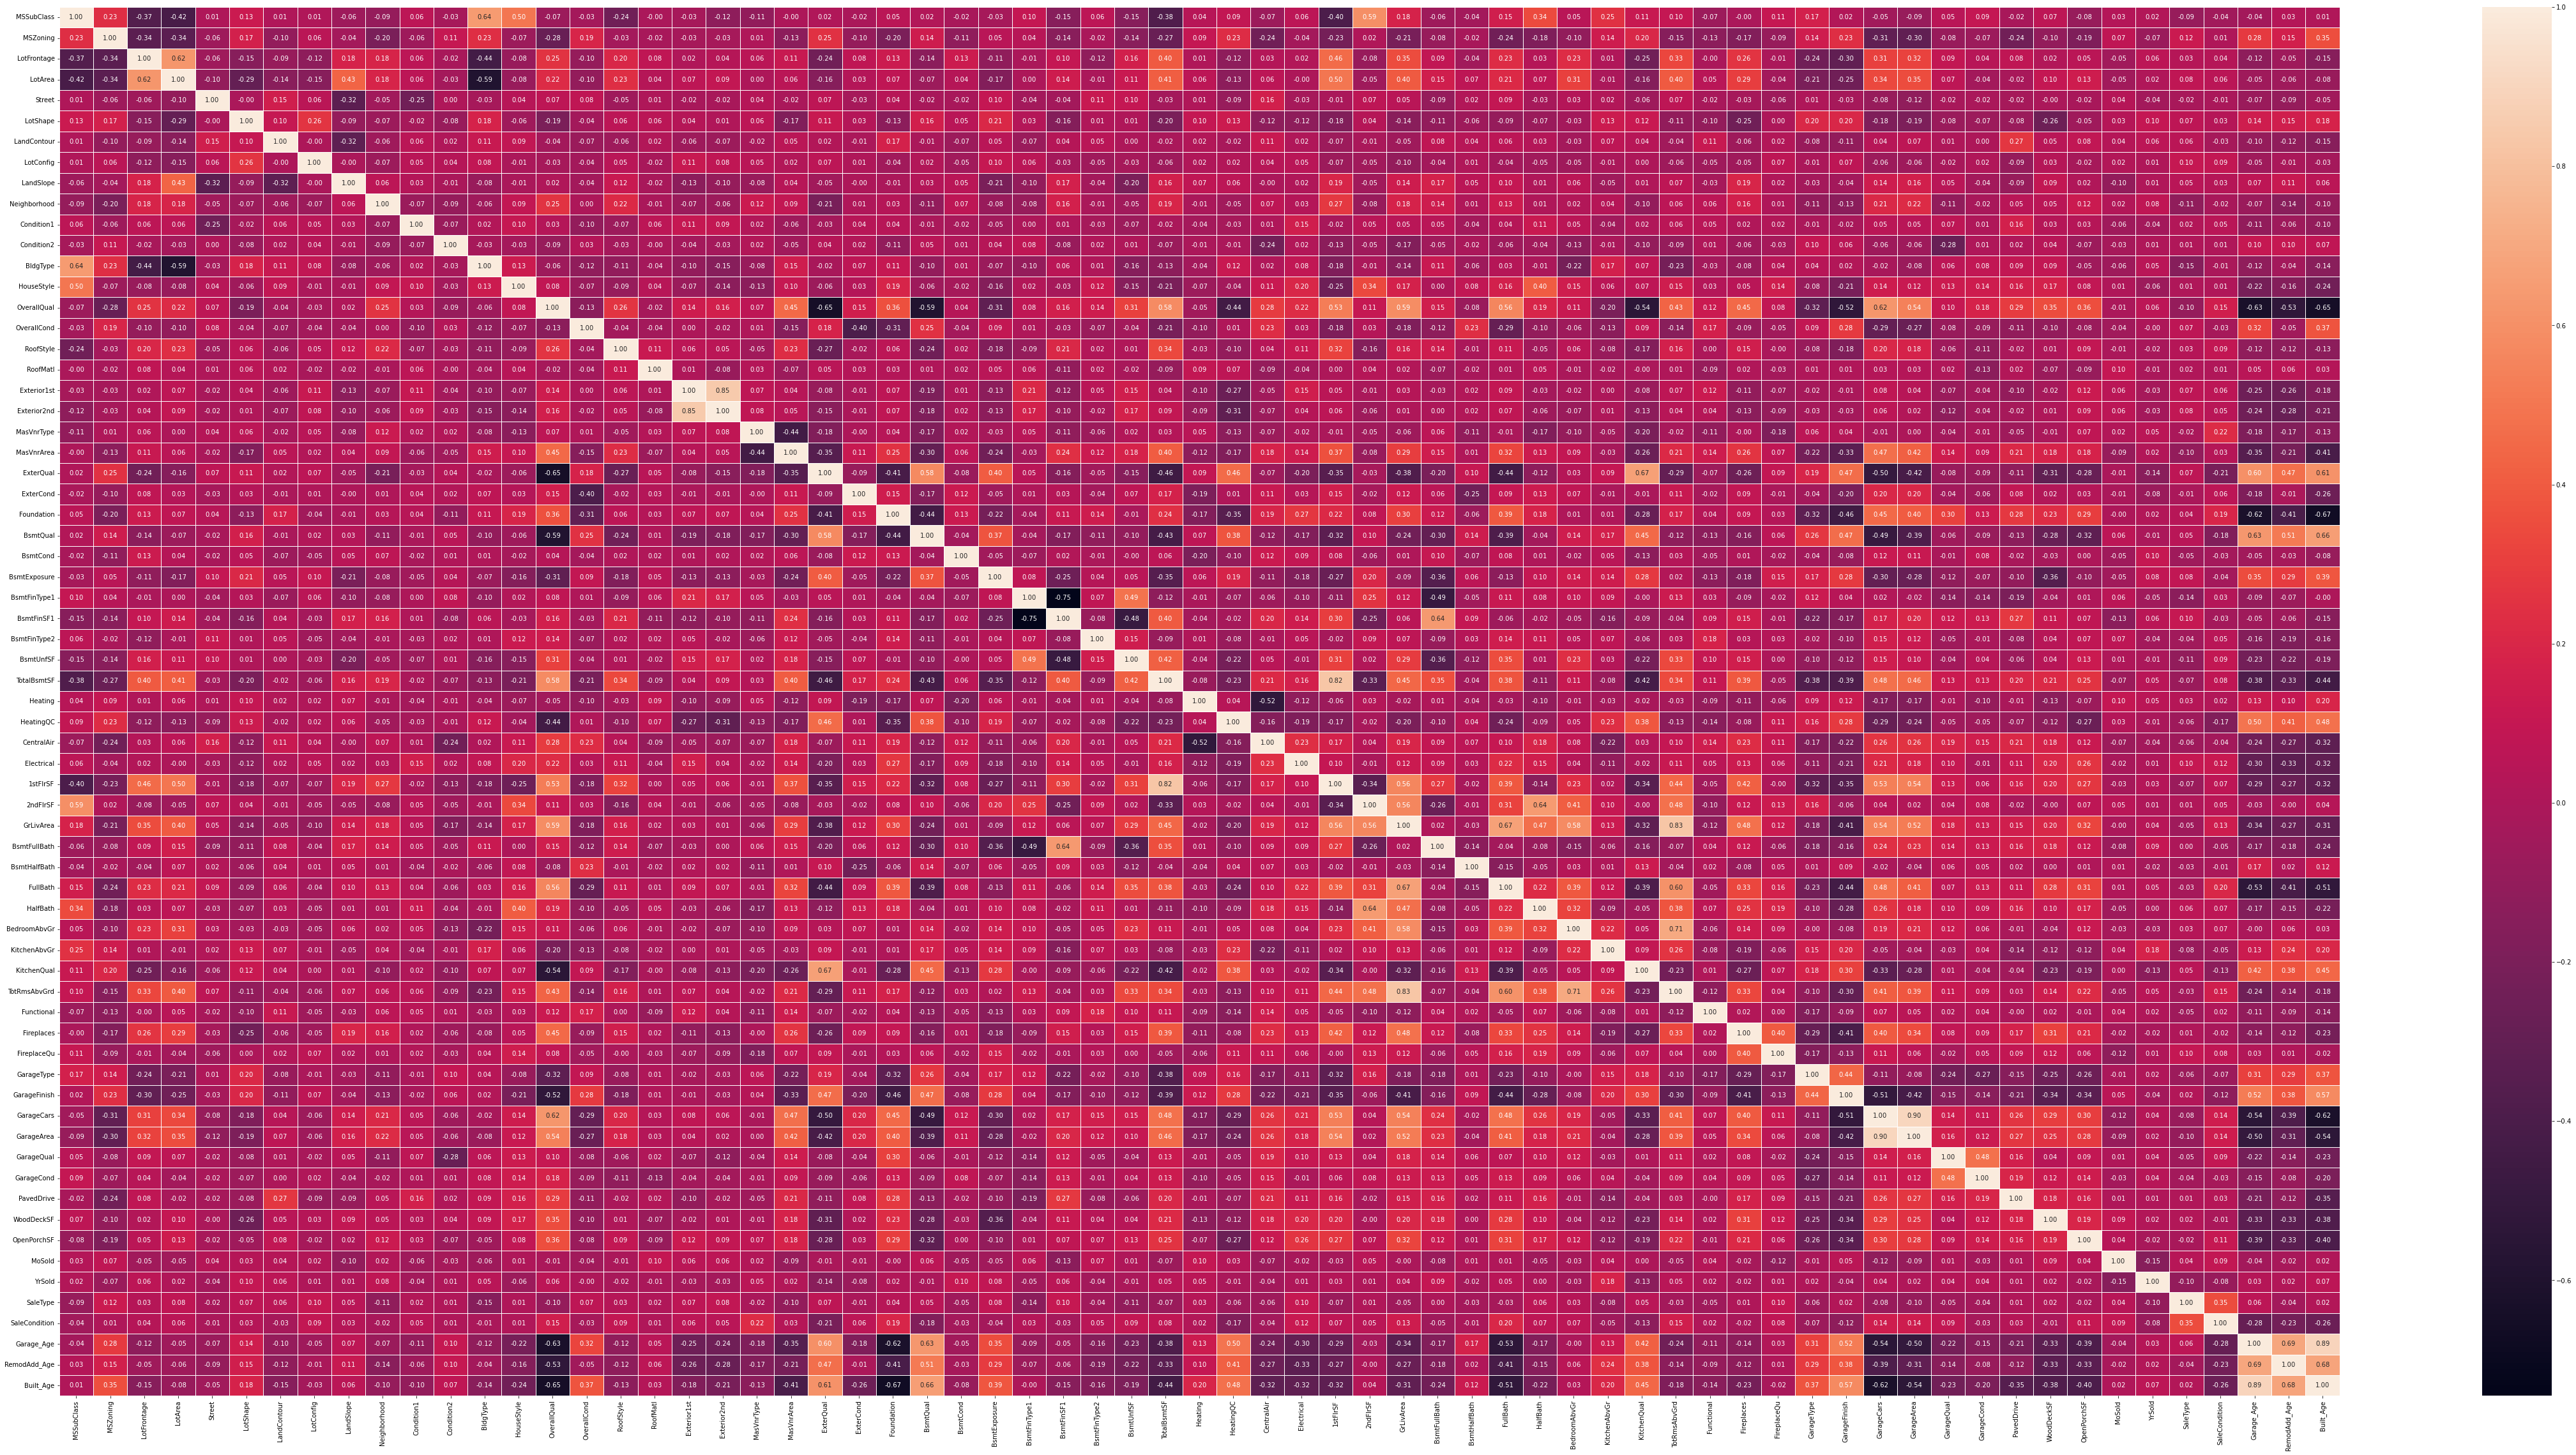

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80,40))
sns.heatmap(df_test.corr(),annot=True,linewidth=0.5,fmt='.2f')

# Separating Features and label as x and y:

In [75]:
x = df_train.drop("SalePrice",axis=1)
y = df_train["SalePrice"]

In [76]:
x.shape

(1168, 66)

In [77]:
y.shape

(1168,)

# Scaling:

Train Dataset:

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [79]:
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.370435 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1   -1.167999 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2    0.490047 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3   -1.167999 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4   -1.167999 -0.021646     0.039092  1.497522  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.496528  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.407009  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.496528  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.407009   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.234321  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.822896   0.671093   0.369322   
1     1.079014     1.050880    0.395209   -0.822896  -0.759266  -2.318331   
2    -0.535912    -0.682775    0.395209   -0.822896  -0.759266   0.369322   
3    -0.212927    -0.104890   -1.241686    1.385487   0.671093   0.369322   
4    -1.504868    -1.549602    2.032104    1.140684  -0.759266   0.369322   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836 -0.329500  0.293234      0.635539     -1.523529   -0.117054   
1    0.852451  0.836731 -2.672114     -1.113129     -1.523529    0.395541   
2    0.852451 -0.329500  0.293234     -1.987463     -0.434828    0.934402   
3   -0.557836 -0.329500  0.293234      0.635539     -0.979178    0.803940   
4   -0.557836 -0.329500  0.293234      0.635539     -1.523529    1.189724   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0      0.310141   0.916764     0.067300 -0.11909   1.390230    0.267506   
1     -0.771186   1.042594     2.453434 -0.11909  -0.897602    0.267506   
2      0.310141  -0.510359     0.165553 -0.11909  -0.897602    0.267506   
3      0.310141   1.178365     1.997087 -0.11909  -0.897602    0.267506   
4      0.310141  -0.230032     1.387415 -0.11909   0.246314    0.267506   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    0.299036 -0.481887 -0.871789  -1.281768     -0.838227     -0.238775   
1    0.299036  2.082190 -0.871789   1.377184      1.192995     -0.238775   
2    0.299036  0.048689  1.177246   1.060650      1.192995     -0.238775   
3    0.299036  1.665038 -0.871789   0.775546     -0.838227     -0.238775   
4    0.299036  1.201931 -0.871789   0.322952     -0.838227      4.188040   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0  0.793082 -0.782707     -1.144966     0.806154     -1.009429    0.261146   
1  0.793082 -0.782707      1.475072    -0.394851      0.975397    0.261146   
2  0.793082  1.268421      0.165053     0.806154      0.975397    0.261146   
3  0.793082 -0.782707      0.165053     0.806154      0.313788    0.261146   
4  0.793082 -0.782707      0.165053    -0.394851      0.975397    0.261146   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
0    0.779453     1.778446   -0.693653     -0.288773    0.307737   -0.163806   
1    0.779453     1.778446   -0.693653      0.946709    0.307737    0.717359   
2    0.779453     1.778446   -0.693653      0.946709    0.307737   -0.090782   
3    0.779453     1.778446   -0.693653     -0

Test Dataset:

In [80]:
scaler = StandardScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns)
df_test.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -1.149768 -0.287006     0.981605  0.842656  0.083045 -1.402669   
1    1.337666 -0.287006     0.000000 -0.739104  0.083045 -1.402669   
2   -1.149768 -0.287006     0.000000  0.524304  0.083045  0.745474   
3    0.705404 -0.287006     0.429998  0.548484  0.083045  0.745474   
4    0.507343 -0.287006     0.981605  0.897263  0.083045 -1.402669   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.566101  -2.001106  -0.226274      1.554460   -0.028763   -0.058621   
1     0.299297  -1.351136  -0.226274      1.554460   -0.028763   -0.058621   
2     0.299297   0.598774  -0.226274     -1.281387   -0.028763   -0.058621   
3    -3.998799   0.598774  -0.226274     -1.114572   -0.028763   -0.058621   
4     0.299297  -1.351136  -0.226274      1.387645   -1.228602   -0.058621   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0 -0.444642   -0.518671     2.157766    -0.464603   1.846195 -0.078757   
1  2.722077   -0.518671     1.419117    -0.464603  -0.523427 -0.078757   
2 -0.444642   -0.518671     1.419117    -0.464603   1.846195 -0.078757   
3 -0.444642    1.011146     0.680468     1.419621  -0.523427 -0.078757   
4 -0.444642    1.011146    -0.058181    -0.464603  -0.523427 -0.078757   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.694397     0.733065    1.952161    1.182923  -0.857858   0.326787   
1    -1.046066    -1.248926    0.355435   -0.846534  -0.857858   0.326787   
2     0.694397     0.733065    0.355435   -0.846534  -0.857858   0.326787   
3    -0.610950    -0.588262    0.355435   -0.846534   0.633181   0.326787   
4     0.694397     0.733065    1.952161    0.952580  -0.857858   0.326787   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0    0.776109 -2.549340     0.219     -1.192678     -0.377559    1.205140   
1   -0.518884 -0.303768     0.219     -2.090260     -0.377559    1.064798   
2    0.776109 -0.303768     0.219     -2.090260      1.284459   -1.375716   
3   -0.518884  0.819019     0.219      0.602487      0.730453    0.235689   
4    0.776109 -0.303768     0.219     -0.295096      1.284459   -1.375716   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
0      0.296045   0.455087     2.074477 -0.141879  -0.880154    0.248633   
1      0.296045  -0.841820     0.418166 -0.141879   0.645098    0.248633   
2      0.296045   2.127575     1.675735 -0.141879  -0.880154    0.248633   
3      0.296045  -0.093395    -0.799293 -0.141879  -0.880154    0.248633   
4      0.296045   0.870427    -0.351004 -0.141879  -0.880154    0.248633   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    0.312609  1.814725 -0.870294   0.943726      1.132656     -0.263813   
1    0.312609  0.726749 -0.870294  -0.077517      1.132656     -0.263813   
2    0.312609  1.586900 -0.870294   0.729670     -0.836008     -0.263813   
3    0.312609 -0.705442  1.137231   0.334155     -0.836008     -0.263813   
4    0.312609 -0.584696  1.211129   0.960645     -0.836008     -0.263813   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.776457 -0.738058      0.254952      -0.22441    -0.469314      0.961793   
1 -1.051974 -0.738058     -2.226584      -0.22441    -0.469314     -1.618327   
2  0.776457 -0.738058      0.254952      -0.22441    -2.916451      0.447622   
3 -1.051974  1.349285      0.254952      -0.22441    -1.692883      0.447622   
4  0.776457  1.349285      1.495721      -0.22441    -0.469314      1.420534   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0     0.22482    0.808861    -0.429570   -0.659455     -1.474589    1.687009   
1     0.22482    0.808861    -2.710193   -0.659455     -0.254816    0.359228   
2     0.22482    0.808861     1.851054   -0.659455     -0.254816    0.359228   
3     0.22482    0.808861  

# VIF:

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     5.682842     MSSubClass
1     1.375381       MSZoning
2     2.056531    LotFrontage
3     2.644368        LotArea
4     1.108723         Street
5     1.286084       LotShape
6     1.315158    LandContour
7     1.151081      LotConfig
8     1.452257      LandSlope
9     1.255637   Neighborhood
10    1.149243     Condition1
11    1.084899     Condition2
12    4.403906       BldgType
13    2.544634     HouseStyle
14    3.961593    OverallQual
15    1.887368    OverallCond
16    1.277778      RoofStyle
17    1.189225       RoofMatl
18    4.288466    Exterior1st
19    4.357858    Exterior2nd
20    1.561279     MasVnrType
21    1.989218     MasVnrArea
22    2.669815      ExterQual
23    1.211029      ExterCond
24    2.117435     Foundation
25    2.313491       BsmtQual
26    1.181671       BsmtCond
27    1.603842   BsmtExposure
28    3.017062   BsmtFinType1
29    6.218133     BsmtFinSF1
30    1.340663   BsmtFinType2
31    4.603701      BsmtUnfSF
32    7.566901    TotalBsmtSF
33    1.318556        Heating
34    1.697836      HeatingQC
35    1.682654     CentralAir
36    1.368077     Electrical
37   13.042753       1stFlrSF
38   13.669485       2ndFlrSF
39   19.697518      GrLivArea
40    2.229873   BsmtFullBath
41    1.237138   BsmtHalfBath
42    3.137371       FullBath
43    2.496295       HalfBath
44    2.754886   BedroomAbvGr
45    2.100393    KitchenQual
46    4.749650   TotRmsAbvGrd
47    1.253672     Functional
48    1.941517     Fireplaces
49    1.480985    FireplaceQu
50    1.750464     GarageType
51    2.089066   GarageFinish
52    6.403393     GarageCars
53    6.459879     GarageArea
54    1.591943     GarageQual
55    1.549578     GarageCond
56    1.495522     PavedDrive
57    1.309539     WoodDeckSF
58    1.606949    OpenPorchSF
59    1.078578         MoSold
60    1.114162         YrSold
61    1.124628       SaleType
62    1.197316  SaleCondition
63    5.590836     Garage_Age
64    3.008255   RemodAdd_Age
65    8.177496      Built_Age

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     5.682842     MSSubClass
1     1.375381       MSZoning
2     2.056531    LotFrontage
3     2.644368        LotArea
4     1.108723         Street
5     1.286084       LotShape
6     1.315158    LandContour
7     1.151081      LotConfig
8     1.452257      LandSlope
9     1.255637   Neighborhood
10    1.149243     Condition1
11    1.084899     Condition2
12    4.403906       BldgType
13    2.544634     HouseStyle
14    3.961593    OverallQual
15    1.887368    OverallCond
16    1.277778      RoofStyle
17    1.189225       RoofMatl
18    4.288466    Exterior1st
19    4.357858    Exterior2nd
20    1.561279     MasVnrType
21    1.989218     MasVnrArea
22    2.669815      ExterQual
23    1.211029      ExterCond
24    2.117435     Foundation
25    2.313491       BsmtQual
26    1.181671       BsmtCond
27    1.603842   BsmtExposure
28    3.017062   BsmtFinType1
29    6.218133     BsmtFinSF1
30    1.340663   BsmtFinType2
31    4.603701      BsmtUnfSF
32    7.566901    TotalBsmtSF
33    1.318556        Heating
34    1.697836      HeatingQC
35    1.682654     CentralAir
36    1.368077     Electrical
37   13.042753       1stFlrSF
38   13.669485       2ndFlrSF
39   19.697518      GrLivArea
40    2.229873   BsmtFullBath
41    1.237138   BsmtHalfBath
42    3.137371       FullBath
43    2.496295       HalfBath
44    2.754886   BedroomAbvGr
45    2.100393    KitchenQual
46    4.749650   TotRmsAbvGrd
47    1.253672     Functional
48    1.941517     Fireplaces
49    1.480985    FireplaceQu
50    1.750464     GarageType
51    2.089066   GarageFinish
52    6.403393     GarageCars
53    6.459879     GarageArea
54    1.591943     GarageQual
55    1.549578     GarageCond
56    1.495522     PavedDrive
57    1.309539     WoodDeckSF
58    1.606949    OpenPorchSF
59    1.078578         MoSold
60    1.114162         YrSold
61    1.124628       SaleType
62    1.197316  SaleCondition
63    5.590836     Garage_Age
64    3.008255   RemodAdd_Age
65    8.177496      Built_Age

In [83]:
x.drop("GrLivArea",axis=1,inplace=True)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     5.665855     MSSubClass
1     1.374390       MSZoning
2     2.053641    LotFrontage
3     2.642555        LotArea
4     1.102190         Street
5     1.284756       LotShape
6     1.315020    LandContour
7     1.150857      LotConfig
8     1.446851      LandSlope
9     1.252047   Neighborhood
10    1.148754     Condition1
11    1.082490     Condition2
12    4.376845       BldgType
13    2.491142     HouseStyle
14    3.934347    OverallQual
15    1.875196    OverallCond
16    1.275571      RoofStyle
17    1.188066       RoofMatl
18    4.284034    Exterior1st
19    4.346915    Exterior2nd
20    1.556618     MasVnrType
21    1.988937     MasVnrArea
22    2.669549      ExterQual
23    1.210758      ExterCond
24    2.095102     Foundation
25    2.311850       BsmtQual
26    1.179126       BsmtCond
27    1.602465   BsmtExposure
28    3.017060   BsmtFinType1
29    6.216007     BsmtFinSF1
30    1.340419   BsmtFinType2
31    4.603144      BsmtUnfSF
32    7.514146    TotalBsmtSF
33    1.315534        Heating
34    1.694865      HeatingQC
35    1.678747     CentralAir
36    1.366787     Electrical
37    6.530378       1stFlrSF
38    6.548894       2ndFlrSF
39    2.229695   BsmtFullBath
40    1.235779   BsmtHalfBath
41    2.966312       FullBath
42    2.405369       HalfBath
43    2.727843   BedroomAbvGr
44    2.100204    KitchenQual
45    4.358573   TotRmsAbvGrd
46    1.247411     Functional
47    1.923657     Fireplaces
48    1.480938    FireplaceQu
49    1.750389     GarageType
50    2.079568   GarageFinish
51    6.401362     GarageCars
52    6.427791     GarageArea
53    1.591453     GarageQual
54    1.548315     GarageCond
55    1.494730     PavedDrive
56    1.309096     WoodDeckSF
57    1.597091    OpenPorchSF
58    1.077754         MoSold
59    1.114120         YrSold
60    1.122774       SaleType
61    1.197190  SaleCondition
62    5.586588     Garage_Age
63    3.005541   RemodAdd_Age
64    8.078909      Built_Age

Now checking for Test Dataset:

In [85]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(df_test.values,i) for i in range(len(df_test.columns))]
vif["Features"] =df_test.columns
vif

VIF values       Features
0    10.776244     MSSubClass
1     1.899664       MSZoning
2     2.300225    LotFrontage
3     4.189005        LotArea
4     1.573248         Street
5     1.669606       LotShape
6     1.675086    LandContour
7     1.364144      LotConfig
8     2.259439      LandSlope
9     1.597065   Neighborhood
10    1.350131     Condition1
11    1.496566     Condition2
12    6.638337       BldgType
13    3.689597     HouseStyle
14    5.346315    OverallQual
15    3.102633    OverallCond
16    1.683352      RoofStyle
17    1.274959       RoofMatl
18    5.119523    Exterior1st
19    5.392648    Exterior2nd
20    2.271594     MasVnrType
21    2.656028     MasVnrArea
22    3.967408      ExterQual
23    1.622815      ExterCond
24    2.854581     Foundation
25    2.881656       BsmtQual
26    1.284021       BsmtCond
27    2.138258   BsmtExposure
28    3.569456   BsmtFinType1
29    8.118005     BsmtFinSF1
30    1.683626   BsmtFinType2
31    7.084975      BsmtUnfSF
32   13.033819    TotalBsmtSF
33    2.171876        Heating
34    1.995544      HeatingQC
35    3.061982     CentralAir
36    1.739978     Electrical
37   30.523320       1stFlrSF
38   35.643338       2ndFlrSF
39   50.653069      GrLivArea
40    2.804012   BsmtFullBath
41    1.539663   BsmtHalfBath
42    4.102394       FullBath
43    3.263625       HalfBath
44    3.075872   BedroomAbvGr
45    2.380027   KitchenAbvGr
46    2.726305    KitchenQual
47    6.327660   TotRmsAbvGrd
48    1.727867     Functional
49    2.856254     Fireplaces
50    1.849417    FireplaceQu
51    2.173006     GarageType
52    2.420033   GarageFinish
53    9.702920     GarageCars
54    7.724389     GarageArea
55    2.095556     GarageQual
56    1.895923     GarageCond
57    1.995079     PavedDrive
58    1.729479     WoodDeckSF
59    1.657297    OpenPorchSF
60    1.424462         MoSold
61    1.334739         YrSold
62    1.637079       SaleType
63    1.768221  SaleCondition
64    8.297085     Garage_Age
65    3.824098   RemodAdd_Age
66   16.033934      Built_Age

In [86]:
df_test.drop("GrLivArea",axis=1,inplace=True)

In [87]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(df_test.values,i) for i in range(len(df_test.columns))]
vif["Features"] =df_test.columns
vif

VIF values       Features
0    10.159345     MSSubClass
1     1.899663       MSZoning
2     2.287424    LotFrontage
3     4.186896        LotArea
4     1.565511         Street
5     1.667340       LotShape
6     1.672482    LandContour
7     1.359670      LotConfig
8     2.257389      LandSlope
9     1.595752   Neighborhood
10    1.345567     Condition1
11    1.492561     Condition2
12    6.254331       BldgType
13    3.102115     HouseStyle
14    5.298755    OverallQual
15    3.090617    OverallCond
16    1.677120      RoofStyle
17    1.268471       RoofMatl
18    5.119491    Exterior1st
19    5.352504    Exterior2nd
20    2.268051     MasVnrType
21    2.655994     MasVnrArea
22    3.898179      ExterQual
23    1.619097      ExterCond
24    2.835153     Foundation
25    2.881026       BsmtQual
26    1.269034       BsmtCond
27    2.137923   BsmtExposure
28    3.544809   BsmtFinType1
29    8.116557     BsmtFinSF1
30    1.681293   BsmtFinType2
31    7.061461      BsmtUnfSF
32   12.827817    TotalBsmtSF
33    2.116037        Heating
34    1.980418      HeatingQC
35    3.055527     CentralAir
36    1.739509     Electrical
37    9.175648       1stFlrSF
38    9.536419       2ndFlrSF
39    2.794455   BsmtFullBath
40    1.537554   BsmtHalfBath
41    3.900181       FullBath
42    3.128993       HalfBath
43    3.037784   BedroomAbvGr
44    2.266410   KitchenAbvGr
45    2.724839    KitchenQual
46    6.228340   TotRmsAbvGrd
47    1.700336     Functional
48    2.789819     Fireplaces
49    1.844030    FireplaceQu
50    2.169231     GarageType
51    2.418965   GarageFinish
52    9.689724     GarageCars
53    7.672469     GarageArea
54    2.056860     GarageQual
55    1.880110     GarageCond
56    1.988784     PavedDrive
57    1.728661     WoodDeckSF
58    1.651782    OpenPorchSF
59    1.413459         MoSold
60    1.331638         YrSold
61    1.629203       SaleType
62    1.751775  SaleCondition
63    8.297085     Garage_Age
64    3.817237   RemodAdd_Age
65   15.579187      Built_Age

# Finding the Best Random State:

In [88]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [89]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8961671444395461  on Random_state  50


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)

# Random Forest Regressor:

In [91]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.8849666877912692
MAE: 16874.796709401708
MSE: 635895882.4115475
RMSE: 25216.97607588086


# Decision Tree Regressor:

In [92]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.5659299953722787
MAE: 29044.457264957266
MSE: 2399507788.8418803
RMSE: 48984.77098897044


# ExtraTrees Regressor:

In [93]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.866719215697676
MAE: 17660.900256410256
MSE: 736766596.6936914
RMSE: 27143.444819950386


# GradientBoosting Regressor:

In [94]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy_score is  0.9016455077269709
MAE: 16041.388291812853
MSE: 543696564.5187309
RMSE: 23317.30182758569


# Saving the Model:

In [95]:
import joblib
joblib.dump(GBR,"Housing_project.pkl")

['Housing_project.pkl']

In [96]:
mod=joblib.load("Housing_project.pkl")

In [97]:
pred = mod.predict(x_test)
pred

array([135998.13703377, 173334.22256962, 104820.65443711, 212343.873093  ,
       138790.55930936,  94793.69033619,  96613.45689817, 355427.93704735,
       239473.80894606, 228645.16236063, 290868.89094911, 132060.14376706,
       194757.04672948, 198425.59305984, 168429.75047028, 190723.49236709,
       142287.11515508, 208247.27144209, 150564.1900045 , 168706.436931  ,
       155351.29699987, 323527.23223295, 176178.00584474, 215697.19864639,
       114707.23847148, 136390.31835928, 159910.74243865, 210082.65258763,
       137543.50451247, 133662.15825061, 320652.00039126, 182153.29642894,
       140900.62846771, 196164.66063975,  86410.75946987, 182497.33458905,
       151634.10289047,  67847.15157667, 149311.78356653, 226564.20415755,
       270849.05337895, 192892.95735457, 156936.85553738, 197844.8293911 ,
       176808.82214835, 192086.90180134, 229793.65962082, 175003.96010687,
       160933.30188447, 189487.02643513, 158692.23108124,  50998.39327971,
       160738.04273049, 1

In [98]:
price_pred=pd.DataFrame([mod.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

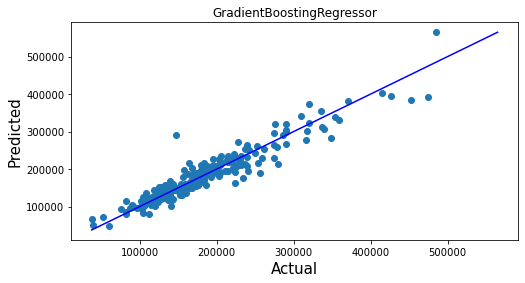

In [99]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, pred)
p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("GradientBoostingRegressor")
plt.show()

In [102]:
#Saving
price_pred.to_csv("House_SalePrice_Prediction.csv",index=False)